#Case Study: Reduksi Dimensi dengan PCA
### Oleh: Muhammad Rosyid Suseno

## Problem Statement
a. Fitur-fitur zat A dan B yang tersimpan pada gradmax.csv dan fftmax.csv memiliki 10 dimensi
sehingga sulit divisualisasi dan dianalisa.<br>
b. Gunakan pendekatan proyeksi, misalnya PCA untuk analisis data multidimensi tersebut

## Metode penyelesaian
1. Melakukan analisis komponen dengan PCA untuk kedua data gradmax.csv dan fftmax.csv
2. Menghitung nilai eigen dan vektor eigen, kemudian lakukan plot:<br>
a. Scree plot untuk nilai-nilai eigen<br>
b. Biplot (score plot dan loading plot)
3. Dari hasil di atas dapatkah PCA digunakan untuk mengurangi dimensi data tersebut?
Bagaimana jika data sangat nonlinier?
4. Dari hasil di atas gunakan PCA untuk mengurangi dimensi data dengan rasio varians yang
dijelaskan sebesar 95%.

###Explorasi Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [ ]:
df_grad = pd.read_csv('gradmax.csv') #Data gradien max
df_fft = pd.read_csv('fouriermax.csv') #Data fft max
features = ['gradmF1', 'gradmF2', 'gradmF3', 'gradmF4', 'gradmF5', 'gradmF6', 'gradmF7', 'gradmF8', 'gradmF9', 'gradmF10']
features_f = ['fouriermF1', 'fouriermF2', 'fouriermF3', 'fouriermF4', 'fouriermF5', 'fouriermF6', 'fouriermF7', 'fouriermF8', 'fouriermF9', 'fouriermF10']

In [ ]:
df_grad

gradmF1  gradmF2  gradmF3  gradmF4  gradmF5  gradmF6  gradmF7   gradmF8  \
0   190.000   14.375    1.250  638.125  270.625  185.000    4.375  1073.750   
1   274.375   23.750    3.750  840.625  416.250  271.875    6.250  1433.125   
2   110.000    7.500    1.875  414.375  138.125  100.000    3.125   670.000   
3   145.000   10.000    1.875  533.750  201.250  138.750    3.750   889.375   
4   212.500   16.875    1.250  703.125  306.250  216.875    5.000  1177.500   
..      ...      ...      ...      ...      ...      ...      ...       ...   
65  184.375   14.375    1.250  579.375  241.875  160.000    4.375  1012.500   
66  233.750   20.000    2.500  750.625  323.750  210.625    3.750  1261.250   
67  220.000   19.375    0.625  659.375  303.125  196.250    3.750  1161.250   
68  232.500   21.250    1.250  766.250  323.125  220.000    6.250  1245.000   
69  214.375   17.500    0.625  681.250  288.125  188.750    3.125  1160.625   

    gradmF9  gradmF10 label  
0   561.875  1053.125     A  
1   710.000  1261.250     A  
2   335.000   734.375     A  
3   451.250   895.625     A  
4   579.375  1075.000     A  
..      ...       ...   ...  
65  491.875  1100.625     B  
66  656.250  1297.500     B  
67  562.500  1175.000     B  
68  631.875  1258.125     B  
69  553.125  1121.875     B  

[70 rows x 11 columns]

In [ ]:
df_grad.describe()

gradmF1    gradmF2    gradmF3     gradmF4     gradmF5     gradmF6  \
count   70.00000  70.000000  70.000000   70.000000   70.000000   70.000000   
mean   170.25000  13.366071   1.446429  560.714286  221.437500  151.857143   
std     53.40155   5.831353   0.616269  144.482236   85.402881   53.904918   
min     82.50000   5.000000   0.625000  318.125000   87.500000   65.625000   
25%    124.21875   8.750000   1.250000  433.906250  147.812500  103.593750   
50%    161.25000  11.875000   1.250000  551.250000  204.062500  140.000000   
75%    212.50000  17.500000   1.875000  657.656250  285.156250  184.843750   
max    285.62500  28.750000   3.750000  875.000000  416.250000  271.875000   

         gradmF7      gradmF8     gradmF9     gradmF10  
count  70.000000    70.000000   70.000000    70.000000  
mean    3.991071   956.098214  448.491071   947.464286  
std     1.137575   249.991337  133.379740   208.057160  
min     1.875000   522.500000  206.250000   575.625000  
25%     3.125000   751.250000  336.562500   776.093750  
50%     3.750000   925.937500  434.062500   935.000000  
75%     4.843750  1143.281250  553.125000  1105.156250  
max     6.875000  1459.375000  730.000000  1395.625000

In [ ]:
df_fft

fouriermF1   fouriermF2  fouriermF3    fouriermF4    fouriermF5  \
0   178175.35875  17534.09250   245.96500  264519.42125  138130.86250   
1   218205.71250  29858.76250   525.00875  295453.63750  181469.54000   
2   121967.04625   8565.24125   268.03375  225436.69375   92383.98750   
3   152126.28000  12160.40750   229.56625  249687.13250  114332.64625   
4   194220.12125  21773.82000   476.01625  271165.40250  160060.40875   
..           ...          ...         ...           ...           ...   
65  180673.39125  17999.31875   430.55625  261986.76000  141973.67000   
66  207409.01625  26045.56875   643.99125  287104.40500  173256.26375   
67  199464.88125  24233.87750   501.84375  269990.99250  167053.70250   
68  207922.19875  27055.96500   622.86625  289632.71500  180980.31000   
69  197262.60375  22544.25250   582.96625  276577.72750  161461.05625   

      fouriermF6  fouriermF7    fouriermF8    fouriermF9   fouriermF10 label  
0    93853.65500  3053.29000  394237.11125  286222.61250  379202.58875     A  
1   119335.64500  4419.83375  426928.15875  309870.85375  407059.23875     A  
2    65976.83500  1785.26125  345048.98625  231518.93250  326922.77125     A  
3    77568.48000  2167.34875  385844.08125  265599.84750  358189.88750     A  
4   104486.57000  3344.17500  399829.45750  281382.70500  374693.16875     A  
..           ...         ...           ...           ...           ...   ...  
65   88574.12875  2032.10000  406189.21375  270867.02500  380756.53500     B  
66  107386.72250  2038.96250  426415.25000  295451.24750  400371.67625     B  
67  105470.18250  2183.60375  408965.07125  278000.59750  385463.89375     B  
68  115766.44000  4298.31375  423210.44125  290233.48375  400907.73375     B  
69  100540.05750  1653.01375  418283.37375  280688.87000  389465.30125     B  

[70 rows x 11 columns]

In [ ]:
df_fft.describe()

fouriermF1    fouriermF2   fouriermF3     fouriermF4     fouriermF5  \
count      70.000000     70.000000    70.000000      70.000000      70.000000   
mean   166569.868000  16615.753625   473.608365  252395.843679  128809.277964   
std     34050.026537   7437.911626   233.319710   28174.809483   35520.264753   
min     97614.087500   6199.923750   176.106383  183653.293750   65651.342500   
25%    137226.448437  10531.230000   294.165000  229297.104687   99362.893437   
50%    164371.310000  14531.350000   455.670625  253825.805625  121179.407500   
75%    196494.829063  22288.497500   597.551875  271985.627500  155027.205000   
max    230623.463750  35477.825000  1552.728750  306787.752500  216609.783750   

          fouriermF6   fouriermF7     fouriermF8     fouriermF9    fouriermF10  
count      70.000000    70.000000      70.000000      70.000000      70.000000  
mean    85989.771607  2742.104849  390575.937179  251354.456321  361583.470571  
std     20759.282619  1116.471589   29572.944420   35130.221722   29369.287617  
min     49740.897500    98.310672  319919.448750  136099.686250  297817.102500  
25%     68257.917188  1999.042813  368096.022500  223760.850000  340531.281562  
50%     82215.990000  2538.177500  395936.325000  257489.079375  364402.124375  
75%    101825.293437  3418.507500  412119.647187  278933.557188  383835.158125  
max    137237.698750  5974.723750  439212.696250  309870.853750  411497.301250

In [ ]:
df_grad.shape

(70, 11)

In [ ]:
df_fft.shape

(70, 11)

In [ ]:
df_grad.keys()

Index(['gradmF1', 'gradmF2', 'gradmF3', 'gradmF4', 'gradmF5', 'gradmF6',
       'gradmF7', 'gradmF8', 'gradmF9', 'gradmF10', 'label'],
      dtype='object')

In [ ]:
df_fft.keys()

Index(['fouriermF1', 'fouriermF2', 'fouriermF3', 'fouriermF4', 'fouriermF5',
       'fouriermF6', 'fouriermF7', 'fouriermF8', 'fouriermF9', 'fouriermF10',
       'label'],
      dtype='object')

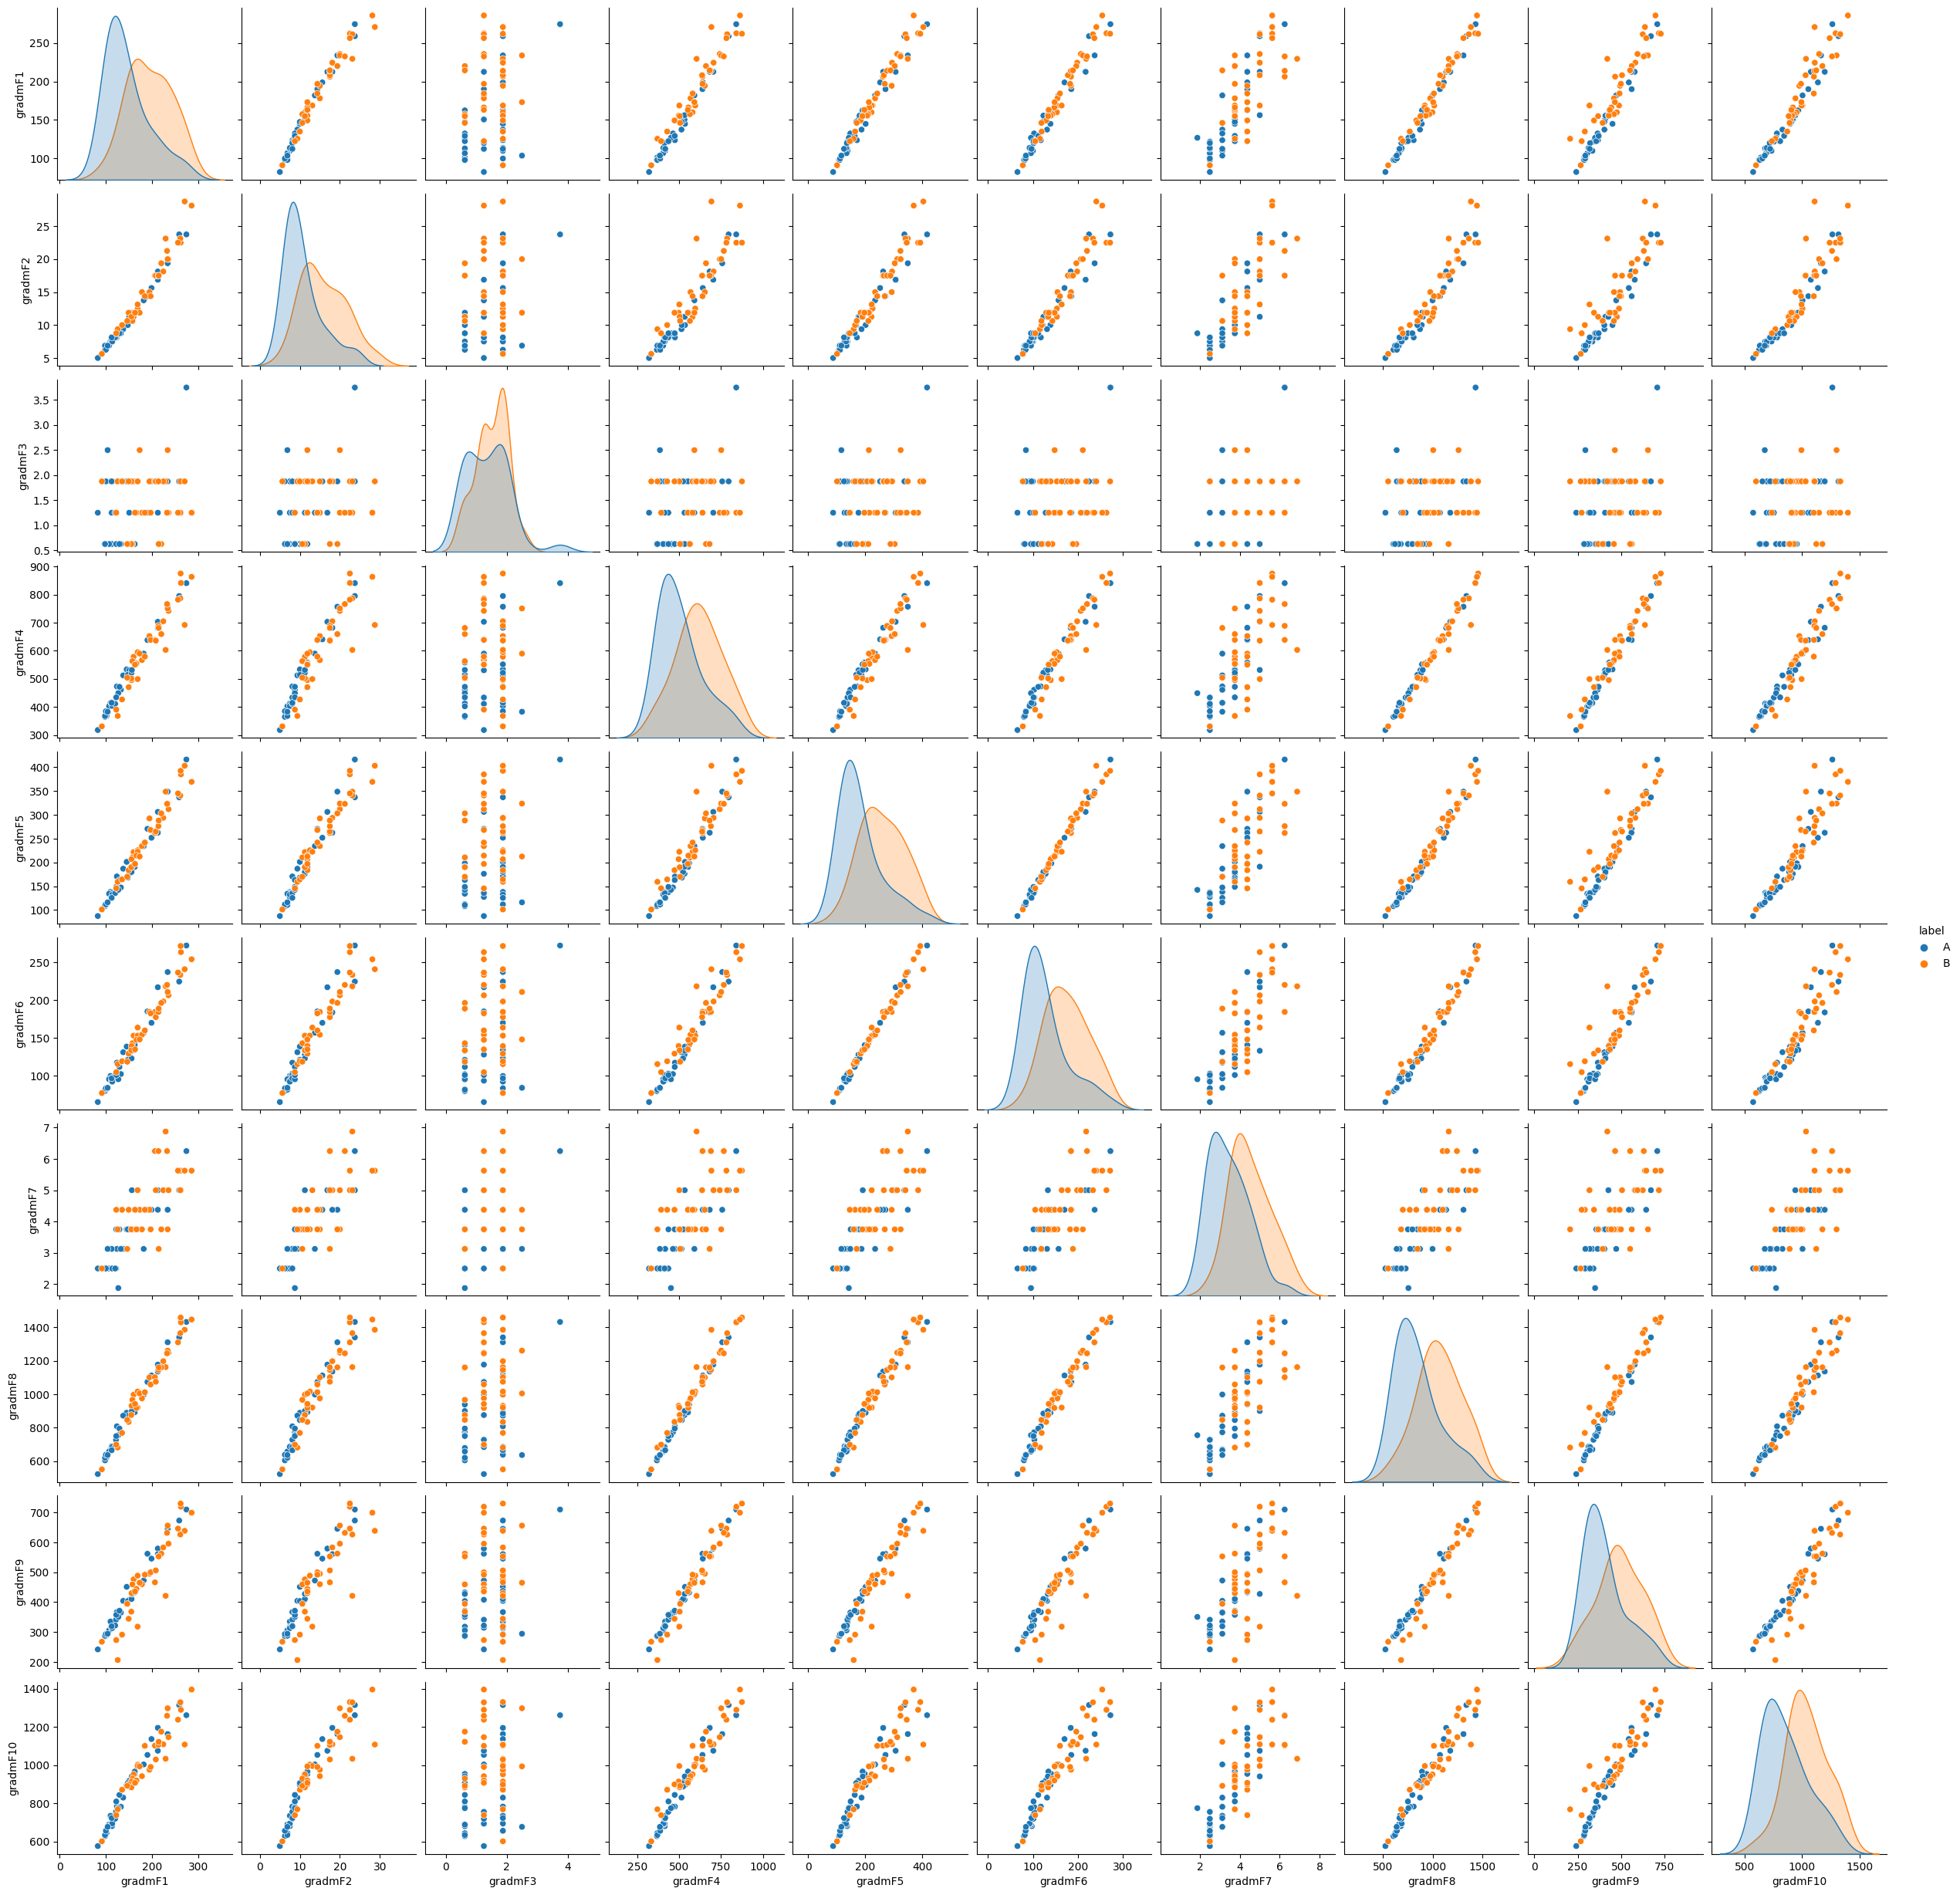

In [ ]:
sns.pairplot(df_grad, hue = 'label')

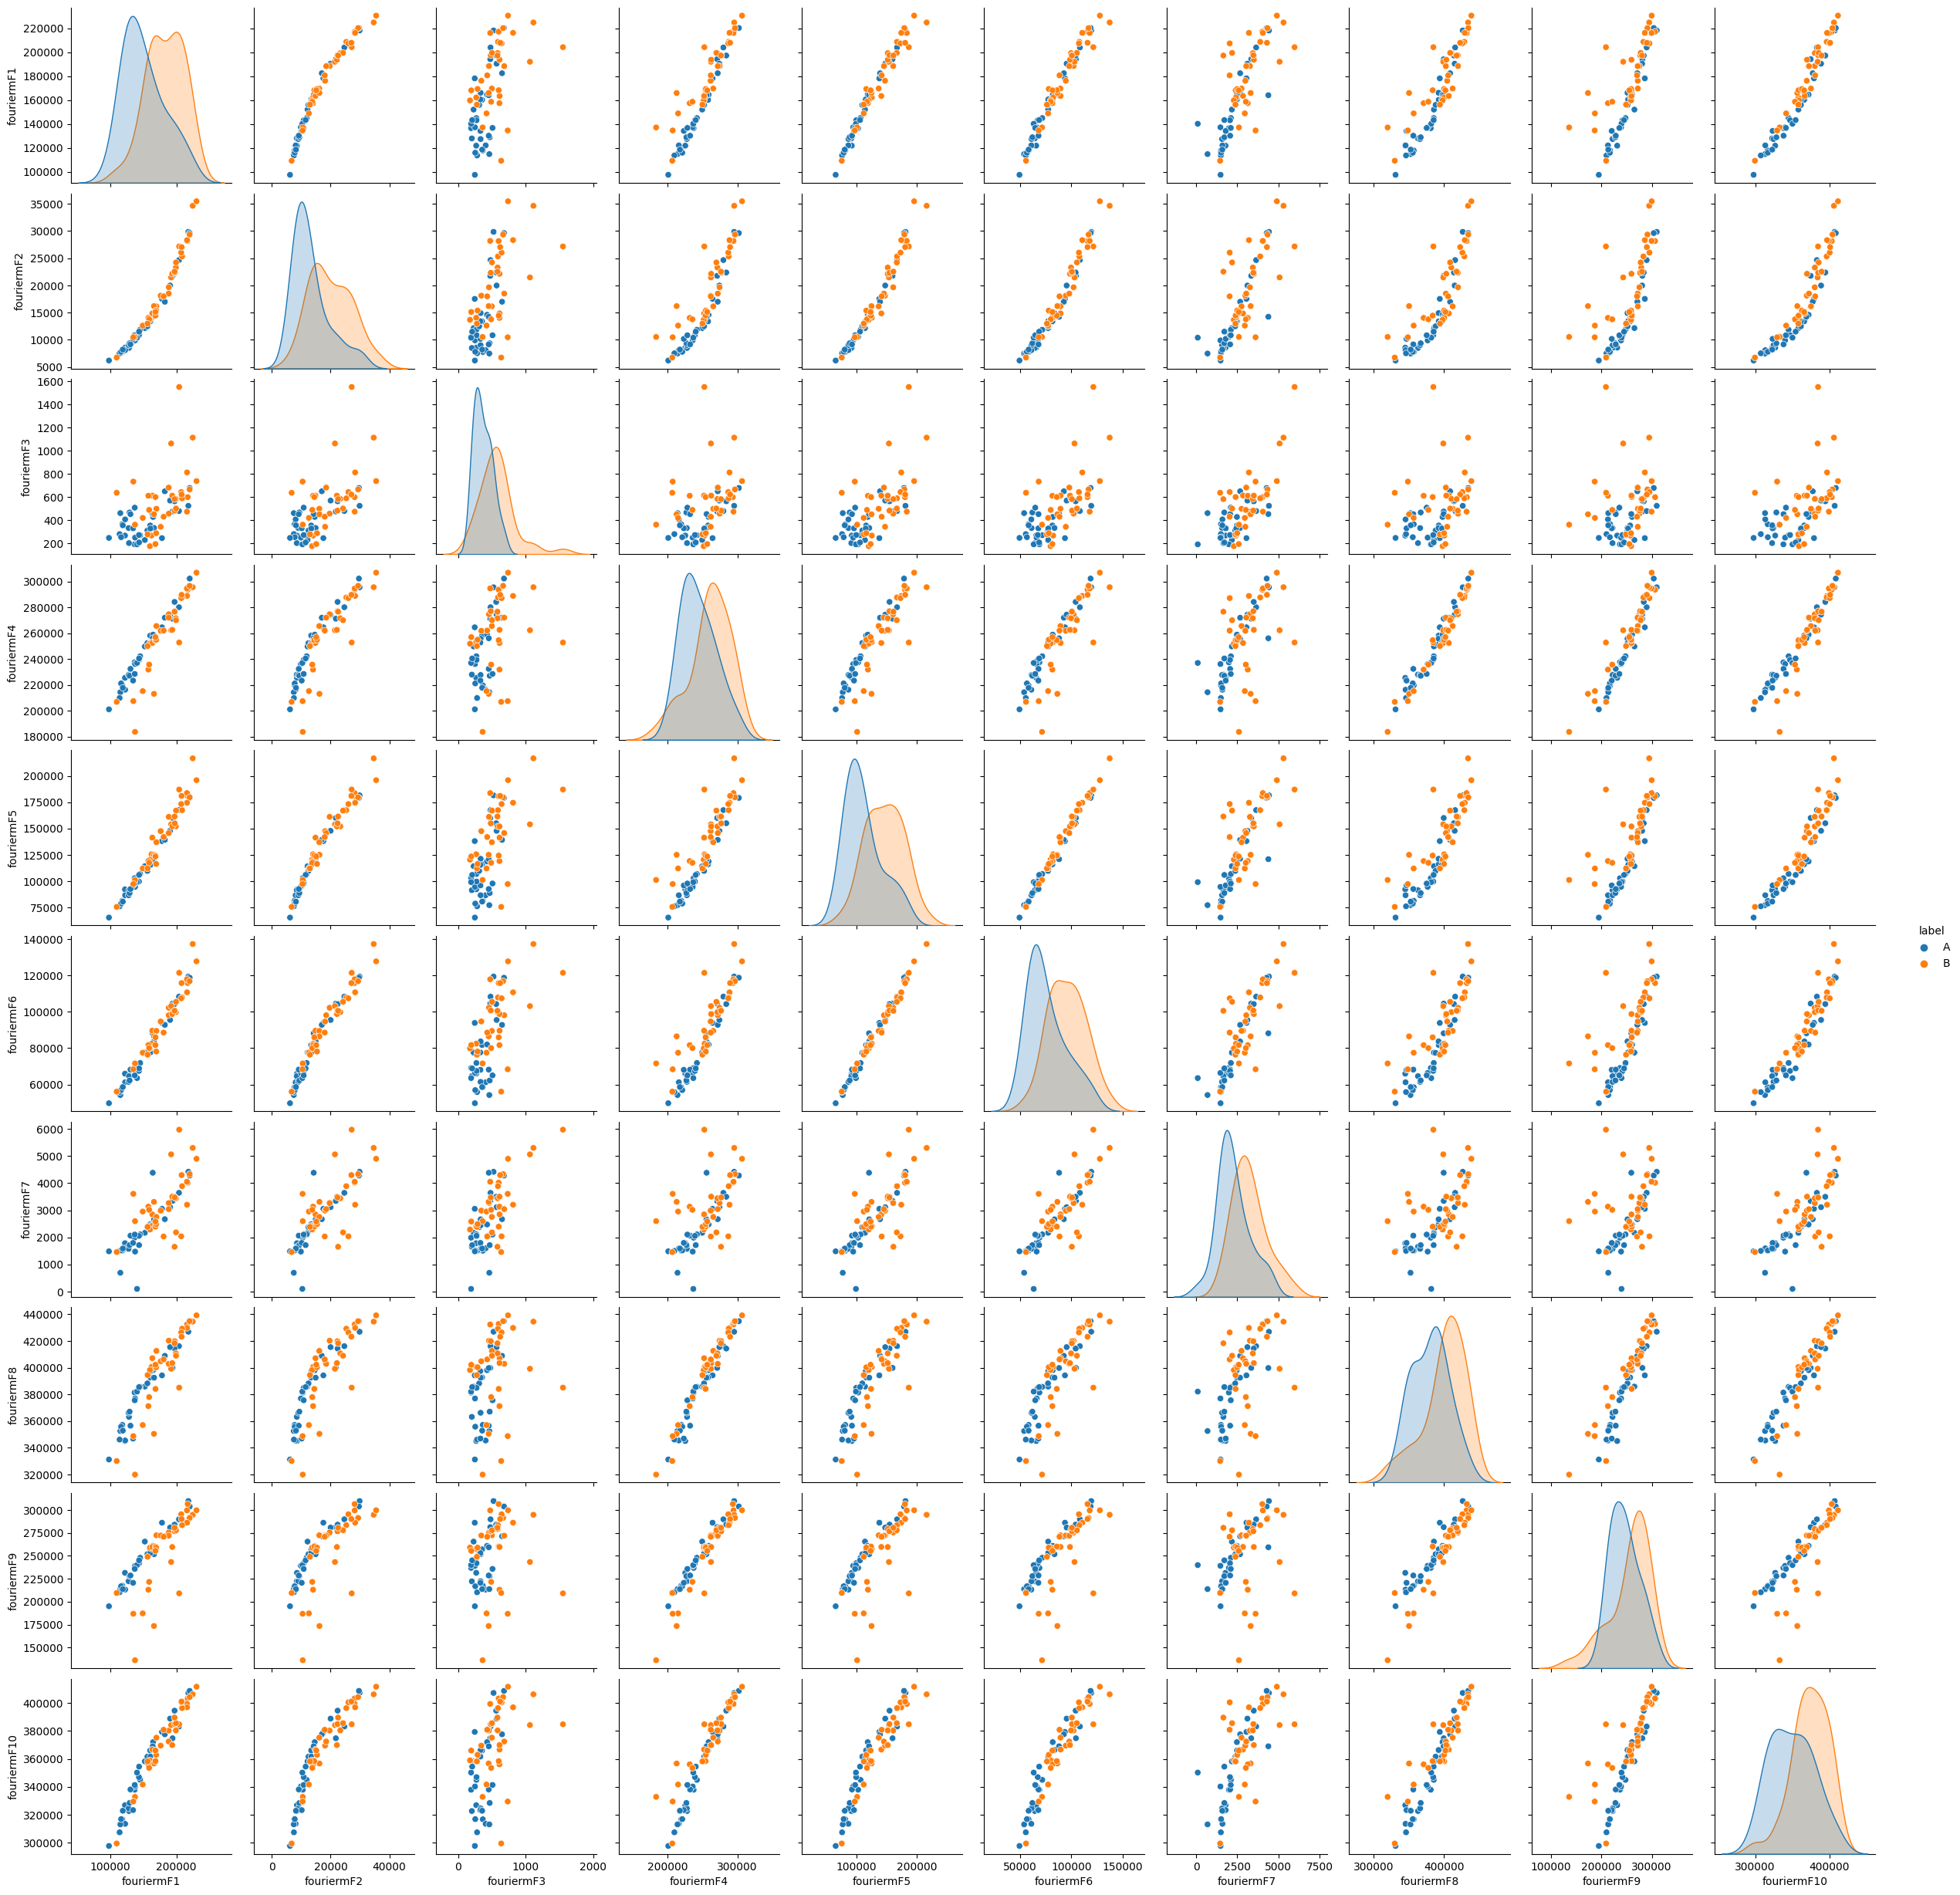

In [ ]:
sns.pairplot(df_fft, hue = 'label')

Text(0.5, 1.0, 'Correlation between different fearures')

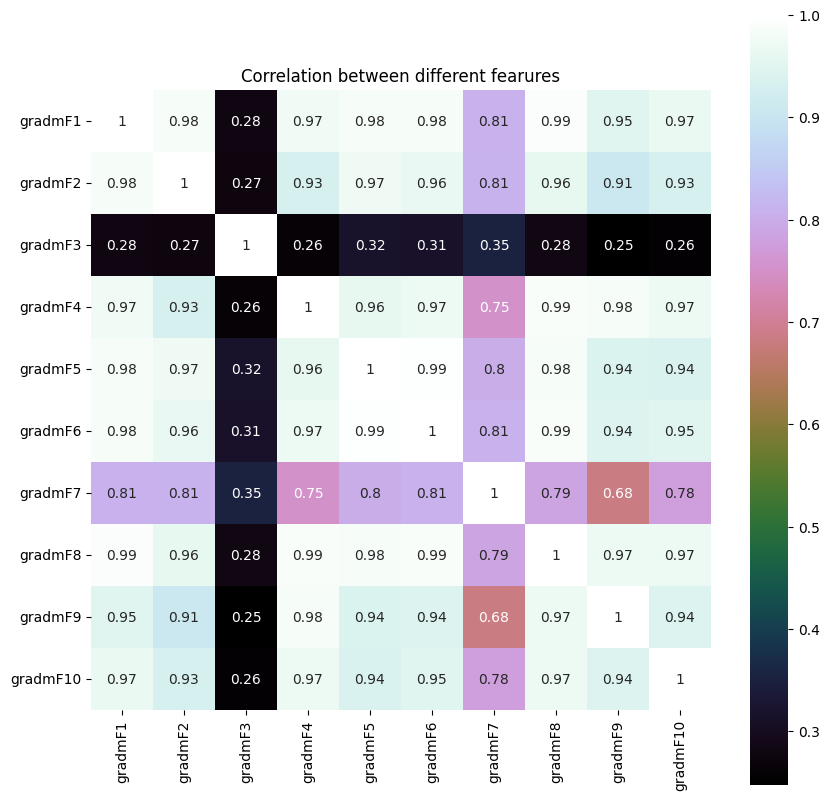

In [ ]:
df1 = df_grad.drop('label', axis=1)
correlation = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

Text(0.5, 1.0, 'Correlation between different fearures')

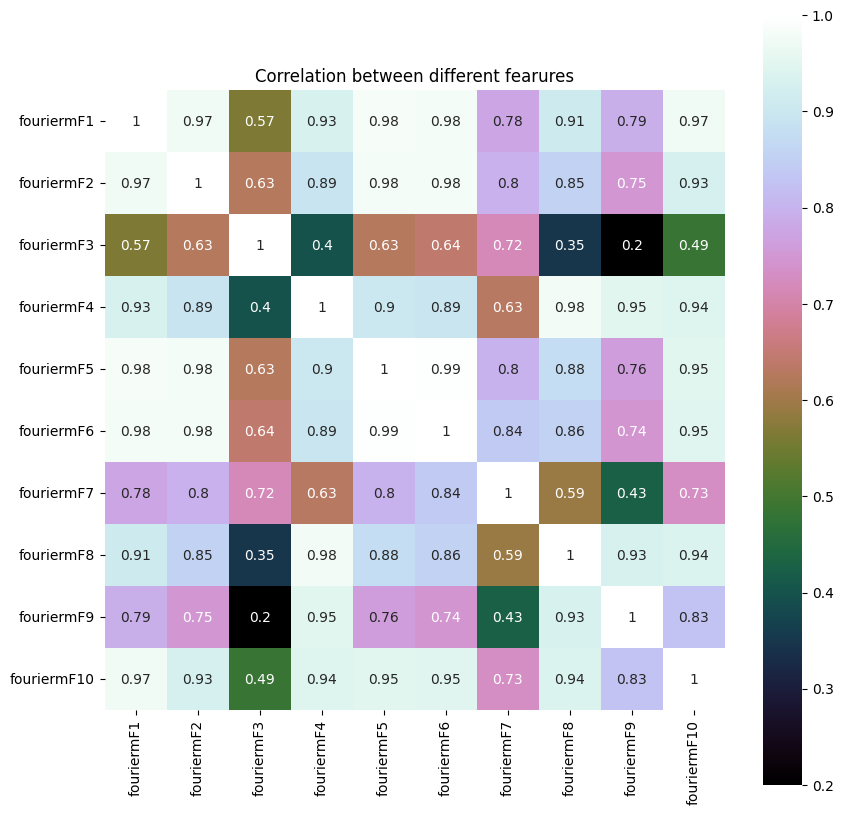

In [ ]:
df2 = df_fft.drop('label', axis=1)
correlation = df2.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

## Nomor 1: Lakukan analisis komponen dengan PCA untuk kedua data gradmax.csv dan fftmax.csv


PCA works:

Standardize the data: If the variables in the dataset have different scales, it's important to standardize them by subtracting the mean and dividing by the standard deviation. This ensures that each variable contributes equally to the analysis.

Compute the covariance matrix: PCA involves calculating the covariance matrix, which measures the relationships between pairs of variables. The covariance between two variables indicates how they vary together. Alternatively, you can also compute the correlation matrix, which is a normalized version of the covariance matrix.

Compute the eigenvectors and eigenvalues: The eigenvectors of the covariance (or correlation) matrix represent the principal components, and the corresponding eigenvalues indicate the amount of variance explained by each principal component. Eigenvectors with higher eigenvalues capture more of the variability in the data.

Select the principal components: Sort the eigenvectors in descending order of their corresponding eigenvalues. This ranking allows you to identify the principal components that explain the most variance in the data. Typically, you select the top k eigenvectors to retain the most important information while reducing the dimensionality.

Transform the data: Construct a projection matrix using the selected eigenvectors and transform the original data onto the new lower-dimensional space. This projection effectively reduces the dimensionality while retaining the essential patterns in the data.

Referensi: https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

#### PCA untuk gradmax

In [ ]:
# Membuat kolom baru 'new_label' untuk kebutuhan spesifik scoreplot
#df_grad['new_label'] = df_grad.apply(lambda row: f"{row['new_label']}{(row.name % 35) + 1}", axis=1)

In [ ]:
X_grad = df_grad.iloc[:,0:10].values
y_grad = df_grad.iloc[:,10].values

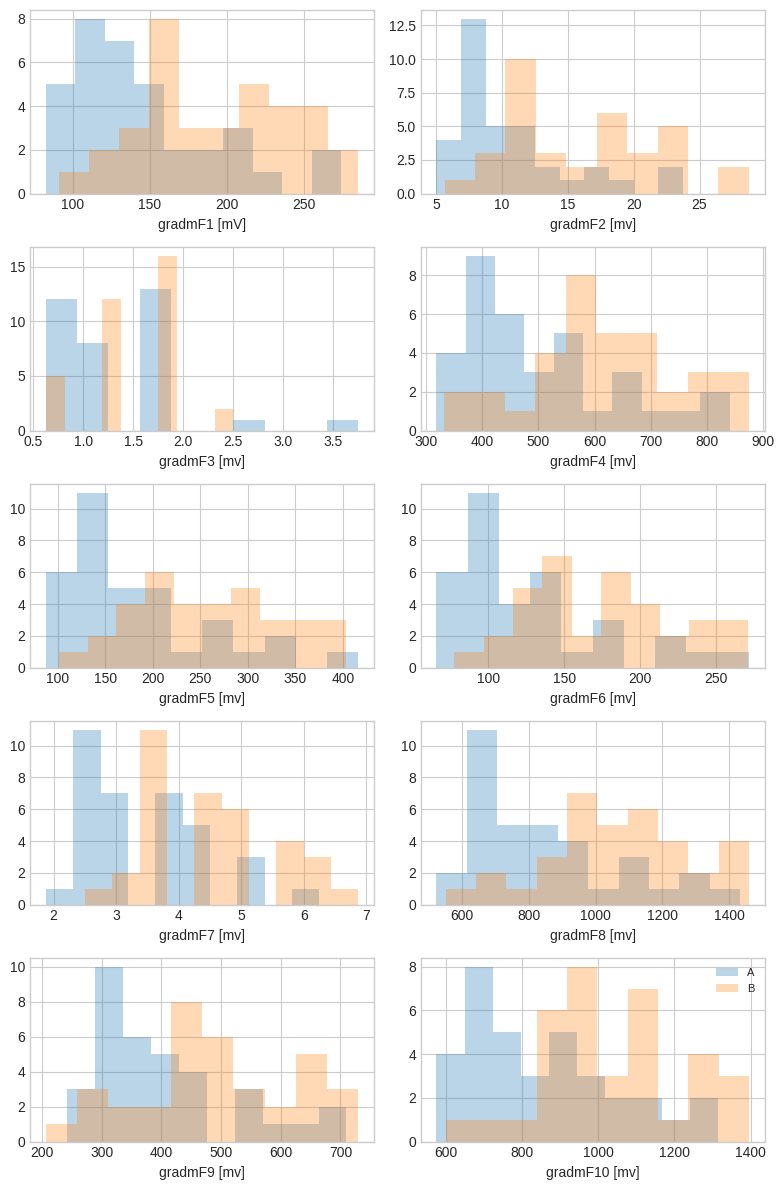

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'A',
              2: 'B'}

feature_dict = {0: 'gradmF1 [mV]',
                1: 'gradmF2 [mv]',
                2: 'gradmF3 [mv]',
                3: 'gradmF4 [mv]',
                4: 'gradmF5 [mv]',
                5: 'gradmF6 [mv]',
                6: 'gradmF7 [mv]',
                7: 'gradmF8 [mv]',
                8: 'gradmF9 [mv]',
                9: 'gradmF10 [mv]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 12))
    for cnt in range(10):
        plt.subplot(5, 2, cnt+1)
        for lab_grad in ('A', 'B'):
            plt.hist(X_grad[y_grad==lab_grad, cnt],
                     label=lab_grad,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

##### Perhitungan manual (Tanpa Sklearn)

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std_grad = StandardScaler().fit_transform(X_grad)

In [ ]:
import numpy as np
mean_vec = np.mean(X_std_grad, axis=0)
cov_mat = (X_std_grad - mean_vec).T.dot((X_std_grad - mean_vec)) / (X_std_grad.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.01449275 0.9981138  0.28275101 0.98826454 0.99899572 0.99853109
  0.81903857 1.00501654 0.96227406 0.98082971]
 [0.9981138  1.01449275 0.27890164 0.94399546 0.98478137 0.97700073
  0.82300382 0.97560354 0.91974199 0.94423986]
 [0.28275101 0.27890164 1.01449275 0.26522409 0.31988359 0.31856555
  0.35648498 0.2856446  0.25105597 0.25954012]
 [0.98826454 0.94399546 0.26522409 1.01449275 0.97412655 0.98426755
  0.76393807 1.00183599 0.99744894 0.98425162]
 [0.99899572 0.98478137 0.31988359 0.97412655 1.01449275 1.00885065
  0.8138484  0.99915713 0.95345151 0.95102575]
 [0.99853109 0.97700073 0.31856555 0.98426755 1.00885065 1.01449275
  0.82043516 1.00031196 0.95717572 0.96285461]
 [0.81903857 0.82300382 0.35648498 0.76393807 0.8138484  0.82043516
  1.01449275 0.79840052 0.69470667 0.79006382]
 [1.00501654 0.97560354 0.2856446  1.00183599 0.99915713 1.00031196
  0.79840052 1.01449275 0.98380513 0.98436536]
 [0.96227406 0.91974199 0.25105597 0.99744894 0.95345151 0.95

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std_grad.T))

NumPy covariance matrix: 
[[1.01449275 0.9981138  0.28275101 0.98826454 0.99899572 0.99853109
  0.81903857 1.00501654 0.96227406 0.98082971]
 [0.9981138  1.01449275 0.27890164 0.94399546 0.98478137 0.97700073
  0.82300382 0.97560354 0.91974199 0.94423986]
 [0.28275101 0.27890164 1.01449275 0.26522409 0.31988359 0.31856555
  0.35648498 0.2856446  0.25105597 0.25954012]
 [0.98826454 0.94399546 0.26522409 1.01449275 0.97412655 0.98426755
  0.76393807 1.00183599 0.99744894 0.98425162]
 [0.99899572 0.98478137 0.31988359 0.97412655 1.01449275 1.00885065
  0.8138484  0.99915713 0.95345151 0.95102575]
 [0.99853109 0.97700073 0.31856555 0.98426755 1.00885065 1.01449275
  0.82043516 1.00031196 0.95717572 0.96285461]
 [0.81903857 0.82300382 0.35648498 0.76393807 0.8138484  0.82043516
  1.01449275 0.79840052 0.69470667 0.79006382]
 [1.00501654 0.97560354 0.2856446  1.00183599 0.99915713 1.00031196
  0.79840052 1.01449275 0.98380513 0.98436536]
 [0.96227406 0.91974199 0.25105597 0.99744894 0.953451

In [ ]:
cov_mat = np.cov(X_std_grad.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.40856780e-01 -5.67555962e-02 -1.07758362e-02  1.86240791e-01
  -1.97547216e-01  7.26615463e-02  3.74967914e-01  1.87523212e-01
  -3.06300284e-01  7.29317042e-01]
 [-3.33594670e-01 -4.55718741e-02  8.73915988e-02  5.66329854e-01
  -3.88135452e-01  4.76829982e-01 -2.50497694e-02 -2.31661719e-01
   1.03759656e-01 -3.39402910e-01]
 [-1.13417382e-01  9.70195959e-01 -2.06193868e-01 -9.98432867e-03
  -4.99857325e-02  2.25899982e-02  1.49036700e-02  1.90381686e-03
  -8.64246345e-04 -2.30839123e-03]
 [-3.36506142e-01 -8.55584185e-02 -1.91860748e-01 -3.21700524e-01
   1.53529769e-01  1.61329737e-02  6.65576758e-01 -2.55420391e-01
   4.33244296e-01 -1.39202442e-01]
 [-3.38790573e-01 -1.30608469e-02 -2.57082911e-02  3.63336515e-01
   3.03915153e-01 -2.98317035e-01 -3.27658437e-01  2.23346522e-01
   6.03054755e-01  2.23829827e-01]
 [-3.39712112e-01 -1.53461174e-02 -2.23126713e-02  2.04055155e-01
   2.84130326e-01 -4.89334933e-01 -4.62517093e-02 -5.17164444e-01
  -4.84413830e-01 -

In [ ]:
eig_vals

array([8.62480713e+00, 9.43358064e-01, 3.62562574e-01, 1.05201926e-01,
       5.60347596e-02, 3.09551013e-02, 1.01207848e-02, 7.02504372e-03,
       2.05995277e-03, 2.80220096e-03])

In [ ]:
cor_mat1 = np.corrcoef(X_std_grad.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.40856780e-01 -5.67555962e-02  1.07758362e-02 -1.86240791e-01
   1.97547216e-01 -7.26615463e-02 -3.74967914e-01 -1.87523212e-01
   3.06300284e-01  7.29317042e-01]
 [-3.33594670e-01 -4.55718741e-02 -8.73915988e-02 -5.66329854e-01
   3.88135452e-01 -4.76829982e-01  2.50497694e-02  2.31661719e-01
  -1.03759656e-01 -3.39402910e-01]
 [-1.13417382e-01  9.70195959e-01  2.06193868e-01  9.98432867e-03
   4.99857325e-02 -2.25899982e-02 -1.49036700e-02 -1.90381686e-03
   8.64246345e-04 -2.30839123e-03]
 [-3.36506142e-01 -8.55584185e-02  1.91860748e-01  3.21700524e-01
  -1.53529769e-01 -1.61329737e-02 -6.65576758e-01  2.55420391e-01
  -4.33244296e-01 -1.39202442e-01]
 [-3.38790573e-01 -1.30608469e-02  2.57082911e-02 -3.63336515e-01
  -3.03915153e-01  2.98317035e-01  3.27658437e-01 -2.23346522e-01
  -6.03054755e-01  2.23829827e-01]
 [-3.39712112e-01 -1.53461174e-02  2.23126713e-02 -2.04055155e-01
  -2.84130326e-01  4.89334933e-01  4.62517093e-02  5.17164444e-01
   4.84413830e-01 -

In [ ]:
cor_mat2 = np.corrcoef(X_grad.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-3.40856780e-01 -5.67555962e-02 -1.07758362e-02  1.86240791e-01
  -1.97547216e-01  7.26615463e-02  3.74967914e-01  1.87523212e-01
   3.06300284e-01  7.29317042e-01]
 [-3.33594670e-01 -4.55718741e-02  8.73915988e-02  5.66329854e-01
  -3.88135452e-01  4.76829982e-01 -2.50497694e-02 -2.31661719e-01
  -1.03759656e-01 -3.39402910e-01]
 [-1.13417382e-01  9.70195959e-01 -2.06193868e-01 -9.98432867e-03
  -4.99857325e-02  2.25899982e-02  1.49036700e-02  1.90381686e-03
   8.64246345e-04 -2.30839123e-03]
 [-3.36506142e-01 -8.55584185e-02 -1.91860748e-01 -3.21700524e-01
   1.53529769e-01  1.61329737e-02  6.65576758e-01 -2.55420391e-01
  -4.33244296e-01 -1.39202442e-01]
 [-3.38790573e-01 -1.30608469e-02 -2.57082911e-02  3.63336515e-01
   3.03915153e-01 -2.98317035e-01 -3.27658437e-01  2.23346522e-01
  -6.03054755e-01  2.23829827e-01]
 [-3.39712112e-01 -1.53461174e-02 -2.23126713e-02  2.04055155e-01
   2.84130326e-01 -4.89334933e-01 -4.62517093e-02 -5.17164444e-01
   4.84413830e-01 -

In [ ]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
8.501595599288853
0.9298815203561366
0.3573831084367593
0.10369904086565174
0.05523426307002175
0.03051288551966703
0.009976202124344592
0.006924685949555897
0.0027621695132664954
0.002030524875743427


In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

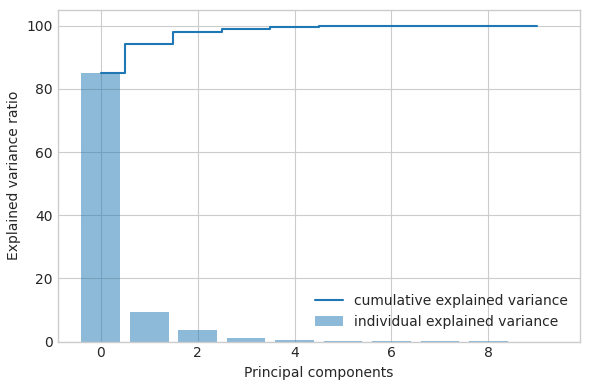

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<ipython-input-1200-c054ab27fd6a>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

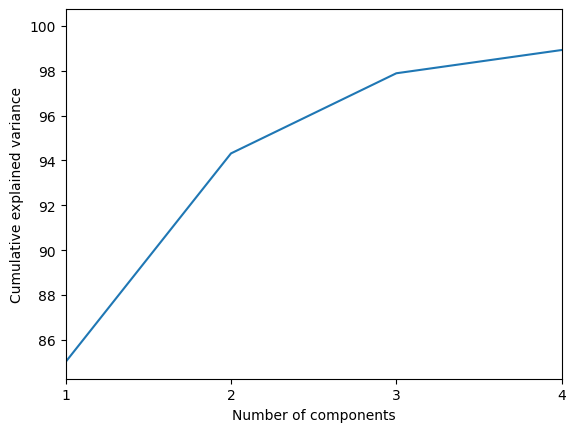

In [ ]:
xint = range(1, len(cum_var_exp) + 1)
plt.plot(xint, cum_var_exp)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [ ]:
print("\n",tot)
print("\n\n1. Kenaikan varians per dimensi\n",var_exp)
print("\n\n2. \n",cum_var_exp)
print("\n\n3. Persentase komponen varians dimensi 2\n ",var_exp[0:2])
print("\n\n4. Persentase kumulatif varians dimensi 2\n",sum(var_exp[0:2]))


 9.999999999999998


1. Kenaikan varians per dimensi
 [85.01595599288855, 9.298815203561366, 3.5738310843675936, 1.0369904086565176, 0.5523426307002176, 0.3051288551966704, 0.09976202124344594, 0.06924685949555899, 0.02762169513266496, 0.020305248757434276]


2. 
 [ 85.01595599  94.3147712   97.88860228  98.92559269  99.47793532
  99.78306418  99.8828262   99.95207306  99.97969475 100.        ]


3. Persentase komponen varians dimensi 2
  [85.01595599288855, 9.298815203561366]


4. Persentase kumulatif varians dimensi 2
 94.31477119644991


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.34085678 -0.0567556 ]
 [-0.33359467 -0.04557187]
 [-0.11341738  0.97019596]
 [-0.33650614 -0.08555842]
 [-0.33879057 -0.01306085]
 [-0.33971211 -0.01534612]
 [-0.28502598  0.15680413]
 [-0.34090463 -0.06011883]
 [-0.32843798 -0.10513031]
 [-0.33304762 -0.08025763]]


In [ ]:
Y_manual_grad = X_std_grad.dot(matrix_w)
Y_manual_grad[:, 0] = -Y_manual_grad[:, 0]
Y_manual_grad[:, 1] = Y_manual_grad[:, 1]

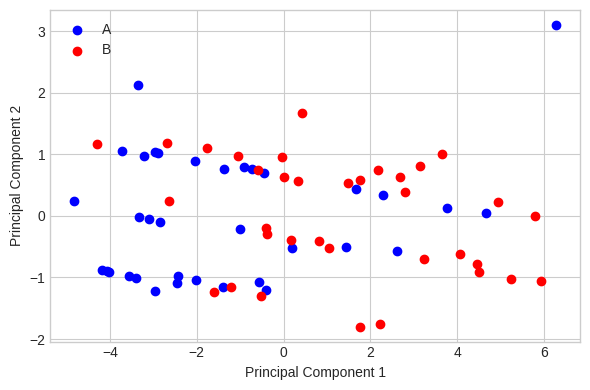

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab_grad, col in zip(('A', 'B'),
                        ('blue', 'red')):
        plt.scatter(Y_manual_grad[y_grad==lab_grad, 0],
                    Y_manual_grad[y_grad==lab_grad, 1],
                    label=lab_grad,
                    c=col)
    plt.title('')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

In [ ]:
principalDf = pd.DataFrame(data = Y_manual_grad
          , columns = ['principal component 1', 'principal component 2'])
principalDf

principal component 1  principal component 2
0                1.447261              -0.510069
1                6.271390               3.096683
2               -2.887823               1.027180
3               -0.733178               0.756693
4                2.612020              -0.567980
..                    ...                    ...
65               0.818558              -0.405456
66               3.651068               0.996220
67               2.223998              -1.749307
68               4.061665              -0.620608
69               1.756080              -1.795651

[70 rows x 2 columns]

In [ ]:
finalDf = pd.concat([principalDf,pd.DataFrame(y_grad,columns = ['label'])], axis = 1)
finalDf

principal component 1  principal component 2 label
0                1.447261              -0.510069     A
1                6.271390               3.096683     A
2               -2.887823               1.027180     A
3               -0.733178               0.756693     A
4                2.612020              -0.567980     A
..                    ...                    ...   ...
65               0.818558              -0.405456     B
66               3.651068               0.996220     B
67               2.223998              -1.749307     B
68               4.061665              -0.620608     B
69               1.756080              -1.795651     B

[70 rows x 3 columns]

#####Perhitungan pakai Sklearn

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn_grad = sklearn_pca.fit_transform(X_std_grad)
Y_sklearnDf_grad = pd.DataFrame(data = Y_sklearn_grad
              , columns = ['principal component 1', 'principal component 2'])
Y_sklearnDf_grad

principal component 1  principal component 2
0                1.447261              -0.510069
1                6.271390               3.096683
2               -2.887823               1.027180
3               -0.733178               0.756693
4                2.612020              -0.567980
..                    ...                    ...
65               0.818558              -0.405456
66               3.651068               0.996220
67               2.223998              -1.749307
68               4.061665              -0.620608
69               1.756080              -1.795651

[70 rows x 2 columns]

In [ ]:
finalDf = pd.concat([principalDf, finalDf[['label']]], axis = 1)
finalDf

principal component 1  principal component 2 label
0                1.447261              -0.510069     A
1                6.271390               3.096683     A
2               -2.887823               1.027180     A
3               -0.733178               0.756693     A
4                2.612020              -0.567980     A
..                    ...                    ...   ...
65               0.818558              -0.405456     B
66               3.651068               0.996220     B
67               2.223998              -1.749307     B
68               4.061665              -0.620608     B
69               1.756080              -1.795651     B

[70 rows x 3 columns]

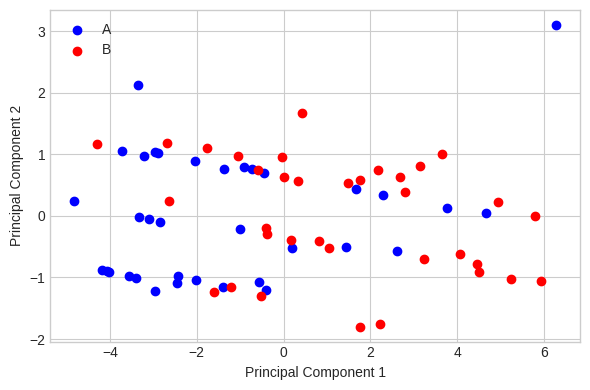

Hasil perhitungan manual dengan Sklearn sama


In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab_grad, col in zip(('A', 'B'),
                        ('blue', 'red')):
        plt.scatter(Y_sklearn_grad[y_grad==lab_grad, 0],
                    Y_sklearn_grad[y_grad==lab_grad, 1],
                    label=lab_grad,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()
print('Hasil perhitungan manual dengan Sklearn sama')

### PCA untuk fouriermax

In [ ]:
# Membuat kolom baru 'label' untuk kebutuhan spesifik scoreplot
#df_fft['label'] = df_fft.apply(lambda row: f"{row['label']}{(row.name % 35) + 1}", axis=1)

In [ ]:
X_fft = df_fft.iloc[:,0:10].values
y_fft = df_fft.iloc[:,10].values

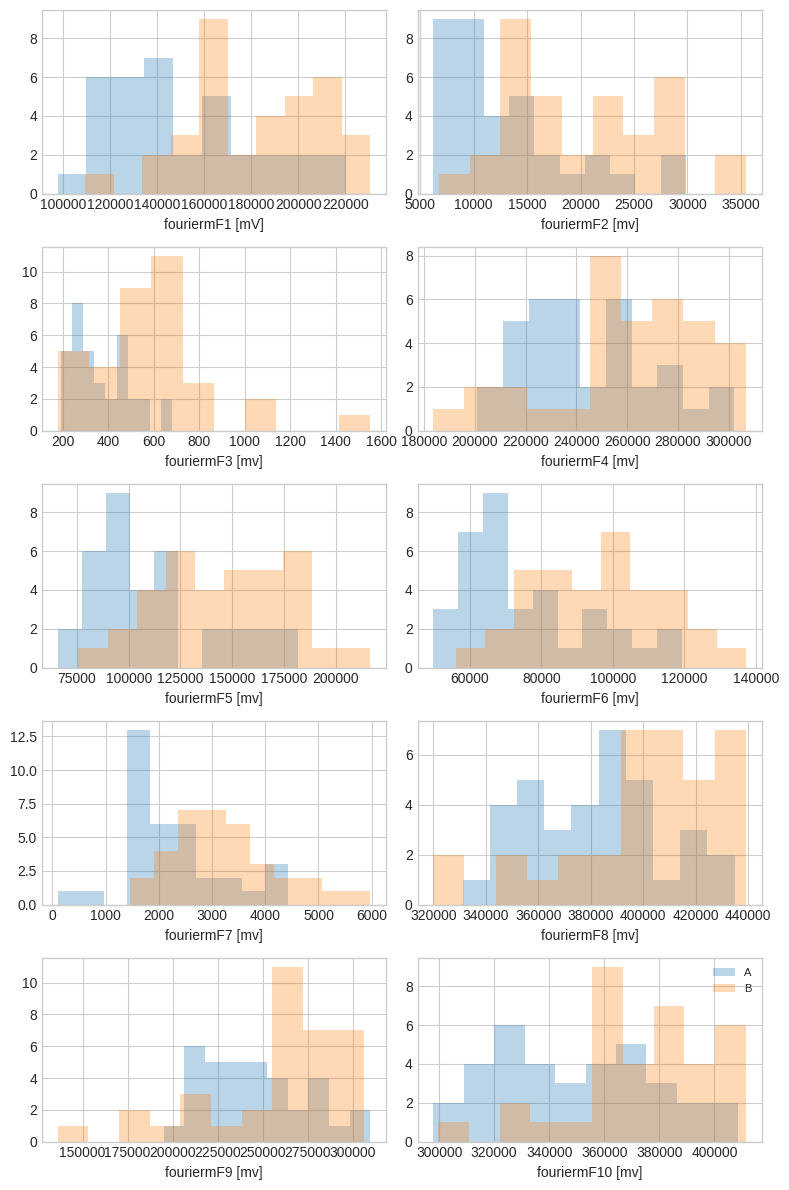

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import math

label_dict = {1: 'A',
              2: 'B'}

feature_dict = {0: 'fouriermF1 [mV]',
                1: 'fouriermF2 [mv]',
                2: 'fouriermF3 [mv]',
                3: 'fouriermF4 [mv]',
                4: 'fouriermF5 [mv]',
                5: 'fouriermF6 [mv]',
                6: 'fouriermF7 [mv]',
                7: 'fouriermF8 [mv]',
                8: 'fouriermF9 [mv]',
                9: 'fouriermF10 [mv]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 12))
    for cnt in range(10):
        plt.subplot(5, 2, cnt+1)
        for lab_fft in ('A', 'B'):
            plt.hist(X_fft[y_fft==lab_fft, cnt],
                     label=lab_fft,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
X_std_fft = StandardScaler().fit_transform(X_fft)

In [ ]:
import numpy as np
mean_f_vecs = np.mean(X_std_fft, axis=0)
cov_f_mat = (X_std_fft - mean_f_vecs).T.dot((X_std_fft - mean_f_vecs)) / (X_std_fft.shape[0]-1)
print('Covariance matrix \n%s' %cov_f_mat)

Covariance matrix 
[[1.01449275 0.98697197 0.57351459 0.9421241  0.99616936 0.99462536
  0.78896948 0.91944401 0.80419092 0.98900593]
 [0.98697197 1.01449275 0.63507149 0.90652905 0.99494581 0.99461222
  0.80758513 0.86673928 0.76008582 0.94003289]
 [0.57351459 0.63507149 1.01449275 0.4041985  0.63417835 0.65010513
  0.72673478 0.35386831 0.20259185 0.49323179]
 [0.9421241  0.90652905 0.4041985  1.01449275 0.91392488 0.9074864
  0.63835831 0.98949824 0.9631455  0.95570076]
 [0.99616936 0.99494581 0.63417835 0.91392488 1.01449275 1.0087078
  0.81084483 0.88774657 0.77177128 0.96294193]
 [0.99462536 0.99461222 0.65010513 0.9074864  1.0087078  1.01449275
  0.85207479 0.86804414 0.75520734 0.95894886]
 [0.78896948 0.80758513 0.72673478 0.63835831 0.81084483 0.85207479
  1.01449275 0.60132212 0.43295856 0.7409332 ]
 [0.91944401 0.86673928 0.35386831 0.98949824 0.88774657 0.86804414
  0.60132212 1.01449275 0.94192393 0.94968862]
 [0.80419092 0.76008582 0.20259185 0.9631455  0.77177128 0.7552

In [ ]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std_fft.T))

NumPy covariance matrix: 
[[1.01449275 0.98697197 0.57351459 0.9421241  0.99616936 0.99462536
  0.78896948 0.91944401 0.80419092 0.98900593]
 [0.98697197 1.01449275 0.63507149 0.90652905 0.99494581 0.99461222
  0.80758513 0.86673928 0.76008582 0.94003289]
 [0.57351459 0.63507149 1.01449275 0.4041985  0.63417835 0.65010513
  0.72673478 0.35386831 0.20259185 0.49323179]
 [0.9421241  0.90652905 0.4041985  1.01449275 0.91392488 0.9074864
  0.63835831 0.98949824 0.9631455  0.95570076]
 [0.99616936 0.99494581 0.63417835 0.91392488 1.01449275 1.0087078
  0.81084483 0.88774657 0.77177128 0.96294193]
 [0.99462536 0.99461222 0.65010513 0.9074864  1.0087078  1.01449275
  0.85207479 0.86804414 0.75520734 0.95894886]
 [0.78896948 0.80758513 0.72673478 0.63835831 0.81084483 0.85207479
  1.01449275 0.60132212 0.43295856 0.7409332 ]
 [0.91944401 0.86673928 0.35386831 0.98949824 0.88774657 0.86804414
  0.60132212 1.01449275 0.94192393 0.94968862]
 [0.80419092 0.76008582 0.20259185 0.9631455  0.77177128

In [ ]:
cov_f_mat = np.cov(X_std_fft.T)

eig_f_vals, eig_f_vecs = np.linalg.eig(cov_f_mat)

print('Eigenvectors \n%s' %eig_f_vecs)
print('\nEigenvalues \n%s' %eig_f_vals)

Eigenvectors 
[[ 0.3438943   0.00150123 -0.10718177  0.27797897  0.11780945  0.08174116
  -0.22976112 -0.75356122 -0.38809041  0.03398067]
 [ 0.33903333 -0.08089673 -0.04494144  0.34060191 -0.42077048 -0.4263112
  -0.49965356  0.37537647 -0.09760704 -0.04006711]
 [ 0.2076446  -0.65643255  0.70211203 -0.1161749   0.12616092  0.03944135
  -0.02838653 -0.00099852 -0.03166936 -0.01549773]
 [ 0.33123422  0.25326163  0.14391977 -0.19643237 -0.06193271  0.03129644
  -0.27815644 -0.22983307  0.73852403  0.29396725]
 [ 0.34251268 -0.06977369 -0.05053951  0.3171572  -0.14142281 -0.0070828
   0.62294199  0.10347577 -0.01756731  0.59628065]
 [ 0.34245378 -0.10574137 -0.12850866  0.20147643 -0.20817785  0.2098058
   0.33987634 -0.06406727  0.32500123 -0.70840251]
 [ 0.27814315 -0.42572393 -0.57473821 -0.62717585 -0.05724059 -0.0289576
  -0.02595808  0.01498555 -0.07555833  0.08366298]
 [ 0.322528    0.29360717  0.10485956 -0.19252011  0.45752722 -0.66468496
   0.25137396  0.01155448 -0.07030032 -0.

In [ ]:
cor_f_mat1 = np.corrcoef(X_std_fft.T)

eig_f_vals, eig_f_vecs = np.linalg.eig(cor_f_mat1)

print('Eigenvectors \n%s' %eig_f_vecs)
print('\nEigenvalues \n%s' %eig_f_vals)

Eigenvectors 
[[ 0.3438943   0.00150123 -0.10718177  0.27797897  0.11780945  0.08174116
  -0.22976112 -0.75356122 -0.38809041  0.03398067]
 [ 0.33903333 -0.08089673 -0.04494144  0.34060191 -0.42077048 -0.4263112
  -0.49965356  0.37537647 -0.09760704 -0.04006711]
 [ 0.2076446  -0.65643255  0.70211203 -0.1161749   0.12616092  0.03944135
  -0.02838653 -0.00099852 -0.03166936 -0.01549773]
 [ 0.33123422  0.25326163  0.14391977 -0.19643237 -0.06193271  0.03129644
  -0.27815644 -0.22983307  0.73852403  0.29396725]
 [ 0.34251268 -0.06977369 -0.05053951  0.3171572  -0.14142281 -0.0070828
   0.62294199  0.10347577 -0.01756731  0.59628065]
 [ 0.34245378 -0.10574137 -0.12850866  0.20147643 -0.20817785  0.2098058
   0.33987634 -0.06406727  0.32500123 -0.70840251]
 [ 0.27814315 -0.42572393 -0.57473821 -0.62717585 -0.05724059 -0.0289576
  -0.02595808  0.01498555 -0.07555833  0.08366298]
 [ 0.322528    0.29360717  0.10485956 -0.19252011  0.45752722 -0.66468496
   0.25137396  0.01155448 -0.07030032 -0.

In [ ]:
cor_f_mat2 = np.corrcoef(X_fft.T)

eig_f_vals, eig_f_vecs = np.linalg.eig(cor_f_mat2)

print('Eigenvectors \n%s' %eig_f_vecs)
print('\nEigenvalues \n%s' %eig_f_vals)

Eigenvectors 
[[ 0.3438943   0.00150123 -0.10718177  0.27797897  0.11780945  0.08174116
  -0.22976112 -0.75356122 -0.38809041  0.03398067]
 [ 0.33903333 -0.08089673 -0.04494144  0.34060191 -0.42077048 -0.4263112
  -0.49965356  0.37537647 -0.09760704 -0.04006711]
 [ 0.2076446  -0.65643255  0.70211203 -0.1161749   0.12616092  0.03944135
  -0.02838653 -0.00099852 -0.03166936 -0.01549773]
 [ 0.33123422  0.25326163  0.14391977 -0.19643237 -0.06193271  0.03129644
  -0.27815644 -0.22983307  0.73852403  0.29396725]
 [ 0.34251268 -0.06977369 -0.05053951  0.3171572  -0.14142281 -0.0070828
   0.62294199  0.10347577 -0.01756731  0.59628065]
 [ 0.34245378 -0.10574137 -0.12850866  0.20147643 -0.20817785  0.2098058
   0.33987634 -0.06406727  0.32500123 -0.70840251]
 [ 0.27814315 -0.42572393 -0.57473821 -0.62717585 -0.05724059 -0.0289576
  -0.02595808  0.01498555 -0.07555833  0.08366298]
 [ 0.322528    0.29360717  0.10485956 -0.19252011  0.45752722 -0.66468496
   0.25137396  0.01155448 -0.07030032 -0.

In [ ]:
for ev in eig_f_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_f_pairs = [(np.abs(eig_f_vals[i]), eig_f_vecs[:,i]) for i in range(len(eig_f_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_f_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_f_pairs:
    print(i[0])

Eigenvalues in descending order:
8.253512098555015
1.1921766329058012
0.2578314611519213
0.15228271897067916
0.07534225216052445
0.029490340679814337
0.02058595027740214
0.009997263582145675
0.007788477530220775
0.0009928041864691


In [ ]:
tot = sum(eig_f_vals)
var_f_exp = [(i / tot)*100 for i in sorted(eig_f_vals, reverse=True)]
cum_f_var_exp = np.cumsum(var_f_exp)

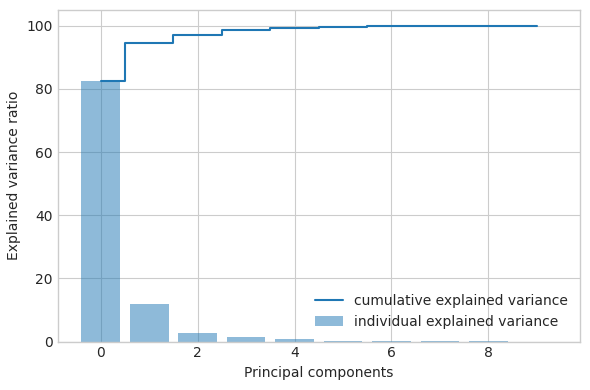

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_f_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_f_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<ipython-input-1223-b436fc883140>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

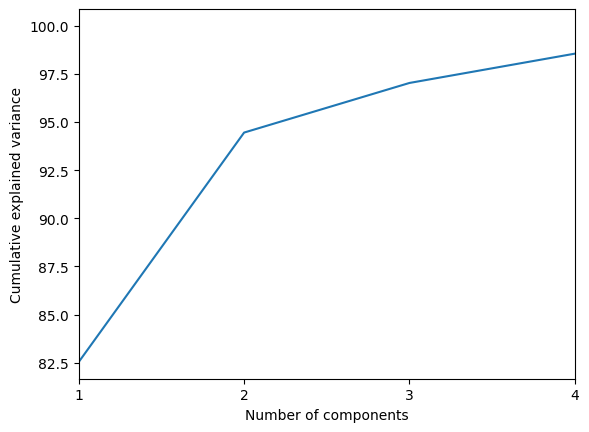

In [ ]:
xint = range(1, len(cum_f_var_exp) + 1)
plt.plot(xint, cum_f_var_exp)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [ ]:
print("\n",tot)
print("\n\n1. Kenaikan varians per dimensi\n",var_f_exp)
print("\n\n2. \n",cum_f_var_exp)
print("\n\n3. Persentase komponen varians dimensi 2\n ",var_f_exp[0:2])
print("\n\n4. Persentase kumulatif varians dimensi 2\n",sum(var_f_exp[0:2]))


 9.999999999999993


1. Kenaikan varians per dimensi
 [82.53512098555021, 11.921766329058022, 2.5783146115192146, 1.5228271897067926, 0.753422521605245, 0.2949034067981436, 0.20585950277402157, 0.09997263582145681, 0.0778847753022078, 0.009928041864691008]


2. 
 [ 82.53512099  94.45688731  97.03520193  98.55802912  99.31145164
  99.60635504  99.81221455  99.91218718  99.99007196 100.        ]


3. Persentase komponen varians dimensi 2
  [82.53512098555021, 11.921766329058022]


4. Persentase kumulatif varians dimensi 2
 94.45688731460822


In [ ]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.34085678 -0.0567556 ]
 [-0.33359467 -0.04557187]
 [-0.11341738  0.97019596]
 [-0.33650614 -0.08555842]
 [-0.33879057 -0.01306085]
 [-0.33971211 -0.01534612]
 [-0.28502598  0.15680413]
 [-0.34090463 -0.06011883]
 [-0.32843798 -0.10513031]
 [-0.33304762 -0.08025763]]


In [ ]:
Y_manual_fft = X_std_fft.dot(matrix_w)
Y_manual_fft[:, 0] = Y_manual_fft[:, 0]
Y_manual_fft[:, 1] = -Y_manual_fft[:, 1]

In [ ]:
principalDf = pd.DataFrame(data = Y_manual_fft
          , columns = ['principal component 1', 'principal component 2'])
principalDf

principal component 1  principal component 2
0               -1.064165               1.142039
1               -4.641468               0.267818
2                3.275472               0.512530
3                0.884196               1.055663
4               -2.038630               0.211296
..                    ...                    ...
65              -0.869517               0.492658
66              -3.211983              -0.035767
67              -2.183379               0.329173
68              -3.995933              -0.263782
69              -2.111591               0.102946

[70 rows x 2 columns]

In [ ]:
finalDf = pd.concat([principalDf,pd.DataFrame(y_fft,columns = ['label'])], axis = 1)
finalDf

principal component 1  principal component 2 label
0               -1.064165               1.142039     A
1               -4.641468               0.267818     A
2                3.275472               0.512530     A
3                0.884196               1.055663     A
4               -2.038630               0.211296     A
..                    ...                    ...   ...
65              -0.869517               0.492658     B
66              -3.211983              -0.035767     B
67              -2.183379               0.329173     B
68              -3.995933              -0.263782     B
69              -2.111591               0.102946     B

[70 rows x 3 columns]

#### Perhitungan pakai Sklearn

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_f = sklearnPCA(n_components=2)
Y_sklearn_fft = sklearn_pca_f.fit_transform(X_std_fft)
Y_sklearnDf_fft = pd.DataFrame(data = Y_sklearn_fft
              , columns = ['principal component 1', 'principal component 2'])
Y_sklearnDf_fft

principal component 1  principal component 2
0                0.932516              -1.114516
1                4.587502              -0.454362
2               -3.319910              -0.140987
3               -1.000427              -1.134800
4                2.006951              -0.245690
..                    ...                    ...
65               0.830259              -0.899972
66               3.231977              -0.860392
67               2.172884              -0.644336
68               4.003568               0.092108
69               2.125316              -0.873797

[70 rows x 2 columns]

In [ ]:
finalDf = pd.concat([principalDf, finalDf[['label']]], axis = 1)
finalDf

principal component 1  principal component 2 label
0               -1.064165               1.142039     A
1               -4.641468               0.267818     A
2                3.275472               0.512530     A
3                0.884196               1.055663     A
4               -2.038630               0.211296     A
..                    ...                    ...   ...
65              -0.869517               0.492658     B
66              -3.211983              -0.035767     B
67              -2.183379               0.329173     B
68              -3.995933              -0.263782     B
69              -2.111591               0.102946     B

[70 rows x 3 columns]

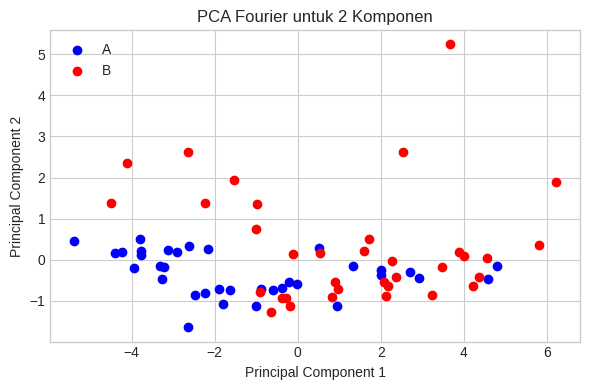

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab_fft, col in zip(('A', 'B'),
                        ('blue', 'red')):
        plt.scatter(Y_sklearn_fft[y_fft==lab_fft, 0],
                    Y_sklearn_fft[y_fft==lab_fft, 1],
                    label=lab_fft,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA Fourier untuk 2 Komponen')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

### Nomor 2: Hitunglah nilai eigen dan vektor eigen, kemudian lakukan plot:
a. Scree plot untuk nilai-nilai eigen<br>
b. Biplot (score plot dan loading plot)

####Untuk gradmax

In [ ]:
x_eigen = df_grad.loc[:, features].values
cov_max_ordinary = np.cov(x_eigen, rowvar=False)
eigvals_ordinary, eigvect_ordinary = np.linalg.eigh(cov_max_ordinary)
covariance_matrix_df = pd.DataFrame(cov_max_ordinary, columns=features, index=features)

print("Covariance Matrix Sebelum Standarisasi:\n", cov_max_ordinary)

Covariance Matrix Sebelum Standarisasi:
 [[2.85172554e+03 3.06375679e+02 9.17232790e+00 7.51610054e+03
  4.49097939e+03 2.83331522e+03 4.90443841e+01 1.32252253e+04
  6.75606091e+03 1.07419022e+04]
 [3.06375679e+02 3.40046746e+01 9.87965839e-01 7.83979523e+02
  4.83429008e+02 3.02721759e+02 5.38148615e+00 1.40190533e+03
  7.05141450e+02 1.12923767e+03]
 [9.17232790e+00 9.87965839e-01 3.79787785e-01 2.32781768e+01
  1.65953351e+01 1.04315476e+01 2.46344462e-01 4.33782997e+01
  2.03414532e+01 3.28026333e+01]
 [7.51610054e+03 7.83979523e+02 2.32781768e+01 2.08751165e+04
  1.18482280e+04 7.55626294e+03 1.23766660e+02 3.56686845e+04
  1.89472438e+04 2.91644847e+04]
 [4.49097939e+03 4.83429008e+02 1.65953351e+01 1.18482280e+04
  7.29365206e+03 4.57803216e+03 7.79376132e+01 2.10272424e+04
  1.07056256e+04 1.66570663e+04]
 [2.83331522e+03 3.02721759e+02 1.04315476e+01 7.55626294e+03
  4.57803216e+03 2.90574017e+03 4.95910973e+01 1.32873953e+04
  6.78361170e+03 1.06444400e+04]
 [4.90443841e+01 

In [ ]:
eigvals_ordinary, eigvect_ordinary = np.linalg.eigh(cov_max_ordinary)
sorted_indices = np.argsort(eigvals_ordinary)[::-1]
eigvals_ordinary = eigvals_ordinary[sorted_indices]
eigen_table = pd.DataFrame({'Nilai': eigvals_ordinary}, index=['Nilai Eigen {}'.format(i+1) for i in range(len(eigvals_ordinary))])

print("Nilai Eigen Sebelum Standarisasi:\n", eigvals_ordinary)

Nilai Eigen Sebelum Standarisasi:
 [1.54098442e+05 1.92480304e+03 1.12387781e+03 1.98759861e+02
 1.40269481e+02 3.67791191e+01 1.14420704e+01 5.05038420e-01
 3.83866211e-01 2.56047153e-01]


In [ ]:
eigvals_ordinary, eigvect_ordinary = np.linalg.eigh(cov_max_ordinary)
eigvect_ordinary = eigvect_ordinary[:, sorted_indices]
eigenvec_table = pd.DataFrame(eigvect_ordinary, columns=['Vektor Eigen {}'.format(i+1) for i in range(len(eigvals_ordinary))])
print("Eigen Vektor Sebelum Standarisasi:\n", eigvect_ordinary)

Eigen Vektor Sebelum Standarisasi:
 [[ 1.34380453e-01  3.60390618e-02 -1.69937123e-01  1.29854000e-02
   1.05367192e-01 -9.32593275e-01  1.98108616e-01  1.74026562e-01
   2.87457212e-02 -2.01193070e-02]
 [ 1.41747212e-02  6.48939816e-03 -3.26449485e-02  2.85085212e-02
   2.40648026e-02 -1.67183891e-01  3.78972726e-02 -9.53235779e-01
  -1.46767419e-01  1.94200000e-01]
 [ 4.28766307e-04  1.09717743e-03 -2.99738636e-03  1.21910861e-03
   7.47611336e-03  1.38403089e-02 -3.16330866e-04  2.53917032e-02
   7.27886303e-01  6.85038238e-01]
 [ 3.65482232e-01  1.26678925e-01  3.25338902e-01 -8.30018037e-01
   1.67963141e-01 -3.30741429e-02 -1.60170862e-01 -2.38522694e-02
  -4.62093974e-03  7.02427821e-03]
 [ 2.12145813e-01  2.51367354e-01 -3.89146514e-01  2.08827260e-01
   6.21439307e-01  6.78574779e-02 -5.53060776e-01  5.17179648e-03
  -3.28757647e-03 -7.71660475e-03]
 [ 1.34627867e-01  1.11498912e-01 -2.02852381e-01 -7.01284933e-02
   4.74822607e-01  2.80795421e-01  7.86620651e-01  5.09326603e-

In [ ]:
mean_vec = np.mean(X_std_grad, axis=0)
cov_mat = (X_std_grad - mean_vec).T.dot((X_std_grad - mean_vec)) / (X_std_grad.shape[0]-1)
print('Covariance matrix (Standarisasi) \n%s' %cov_mat)

Covariance matrix (Standarisasi) 
[[1.01449275 0.9981138  0.28275101 0.98826454 0.99899572 0.99853109
  0.81903857 1.00501654 0.96227406 0.98082971]
 [0.9981138  1.01449275 0.27890164 0.94399546 0.98478137 0.97700073
  0.82300382 0.97560354 0.91974199 0.94423986]
 [0.28275101 0.27890164 1.01449275 0.26522409 0.31988359 0.31856555
  0.35648498 0.2856446  0.25105597 0.25954012]
 [0.98826454 0.94399546 0.26522409 1.01449275 0.97412655 0.98426755
  0.76393807 1.00183599 0.99744894 0.98425162]
 [0.99899572 0.98478137 0.31988359 0.97412655 1.01449275 1.00885065
  0.8138484  0.99915713 0.95345151 0.95102575]
 [0.99853109 0.97700073 0.31856555 0.98426755 1.00885065 1.01449275
  0.82043516 1.00031196 0.95717572 0.96285461]
 [0.81903857 0.82300382 0.35648498 0.76393807 0.8138484  0.82043516
  1.01449275 0.79840052 0.69470667 0.79006382]
 [1.00501654 0.97560354 0.2856446  1.00183599 0.99915713 1.00031196
  0.79840052 1.01449275 0.98380513 0.98436536]
 [0.96227406 0.91974199 0.25105597 0.99744894 

In [ ]:
from tabulate import tabulate

cov_mat = np.cov(X_std_grad.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eigenvalue_table = tabulate({'Eigenvalues': eig_vals}, headers='keys', tablefmt='pretty')

print('Eigenvectors (Standarisasi) \n%s' %eig_vecs)

print('\nEigenvalues (Standarisasi):')
print(eigenvalue_table)


Eigenvectors (Standarisasi) 
[[-3.40856780e-01 -5.67555962e-02 -1.07758362e-02  1.86240791e-01
  -1.97547216e-01  7.26615463e-02  3.74967914e-01  1.87523212e-01
  -3.06300284e-01  7.29317042e-01]
 [-3.33594670e-01 -4.55718741e-02  8.73915988e-02  5.66329854e-01
  -3.88135452e-01  4.76829982e-01 -2.50497694e-02 -2.31661719e-01
   1.03759656e-01 -3.39402910e-01]
 [-1.13417382e-01  9.70195959e-01 -2.06193868e-01 -9.98432867e-03
  -4.99857325e-02  2.25899982e-02  1.49036700e-02  1.90381686e-03
  -8.64246345e-04 -2.30839123e-03]
 [-3.36506142e-01 -8.55584185e-02 -1.91860748e-01 -3.21700524e-01
   1.53529769e-01  1.61329737e-02  6.65576758e-01 -2.55420391e-01
   4.33244296e-01 -1.39202442e-01]
 [-3.38790573e-01 -1.30608469e-02 -2.57082911e-02  3.63336515e-01
   3.03915153e-01 -2.98317035e-01 -3.27658437e-01  2.23346522e-01
   6.03054755e-01  2.23829827e-01]
 [-3.39712112e-01 -1.53461174e-02 -2.23126713e-02  2.04055155e-01
   2.84130326e-01 -4.89334933e-01 -4.62517093e-02 -5.17164444e-01
  -4

a. Screeplot

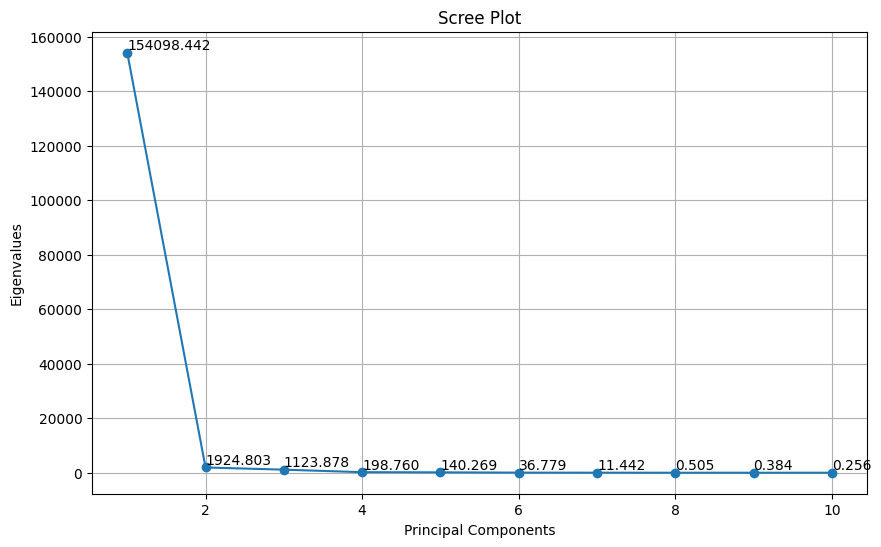

In [ ]:
sorted_indices_grad = np.argsort(eigvals_ordinary)[::-1]
sorted_eigvals_grad = eigvals_ordinary[sorted_indices_grad]

# Plotting scree plot dengan menampilkan nilai-eigenvalue
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigvals_grad) + 1), sorted_eigvals_grad, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)

# Menampilkan nilai-eigenvalue pada tiap titik plot
for i, eigval in enumerate(sorted_eigvals_grad):
    plt.text(i + 1, eigval, f'{eigval:.3f}', ha='left', va='bottom')

plt.show()

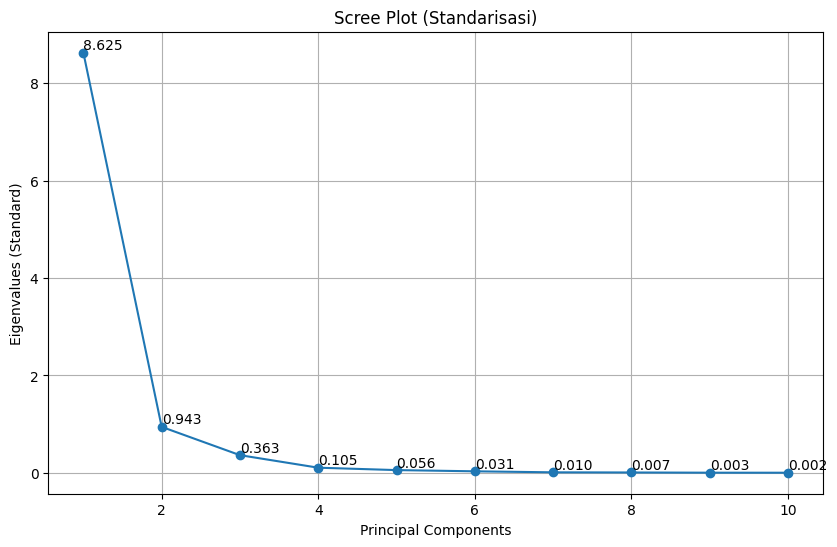

In [ ]:
sorted_indices = np.argsort(eig_vals)[::-1]
sorted_eigvals = eig_vals[sorted_indices]

# Plotting scree plot dengan menampilkan nilai-eigenvalue
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigvals) + 1), sorted_eigvals, marker='o')
plt.title('Scree Plot (Standarisasi)')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues (Standard)')
plt.grid(True)

# Menampilkan nilai-eigenvalue pada tiap titik plot
for i, eigval in enumerate(sorted_eigvals):
    plt.text(i + 1, eigval, f'{eigval:.3f}', ha='left', va='bottom')

plt.show()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_var = sklearnPCA(n_components=4)
Y_sklearn_grad = sklearn_pca_var.fit_transform(X_std_grad)
explained_variance_ratio = sklearn_pca_var.explained_variance_ratio_

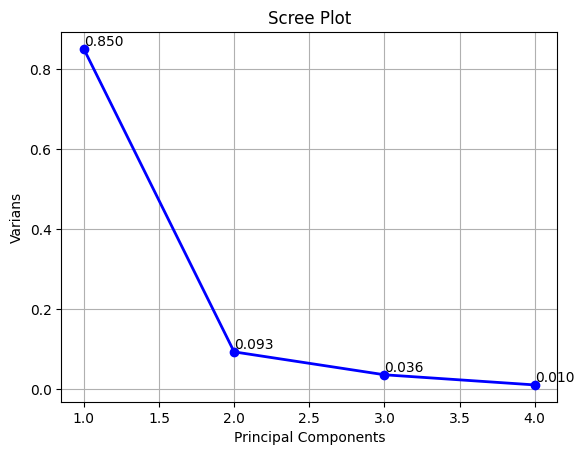

In [ ]:
PC_values = np.arange(sklearn_pca_var.n_components) + 1
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Varians')
plt.grid()
for pc, var_ratio in zip(PC_values, explained_variance_ratio):
    plt.text(pc, var_ratio, f'{var_ratio:.3f}', ha='left', va='bottom')
plt.show()

In [ ]:
print(sklearn_pca_var.explained_variance_ratio_)

[0.85015956 0.09298815 0.03573831 0.0103699 ]


b. Biplot

In [ ]:
sklearn_pca

PCA(n_components=2)

In [ ]:
loadings = pd.DataFrame(sklearn_pca.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=features)
loadings

Principal Component 1  Principal Component 2
gradmF1                0.340857              -0.056756
gradmF2                0.333595              -0.045572
gradmF3                0.113417               0.970196
gradmF4                0.336506              -0.085558
gradmF5                0.338791              -0.013061
gradmF6                0.339712              -0.015346
gradmF7                0.285026               0.156804
gradmF8                0.340905              -0.060119
gradmF9                0.328438              -0.105130
gradmF10               0.333048              -0.080258

In [ ]:
scalePC1 = 1.0 / (loadings['Principal Component 1'].max() - loadings['Principal Component 1'].min())
scalePC2 = 1.0 / (loadings['Principal Component 2'].max() - loadings['Principal Component 2'].min())

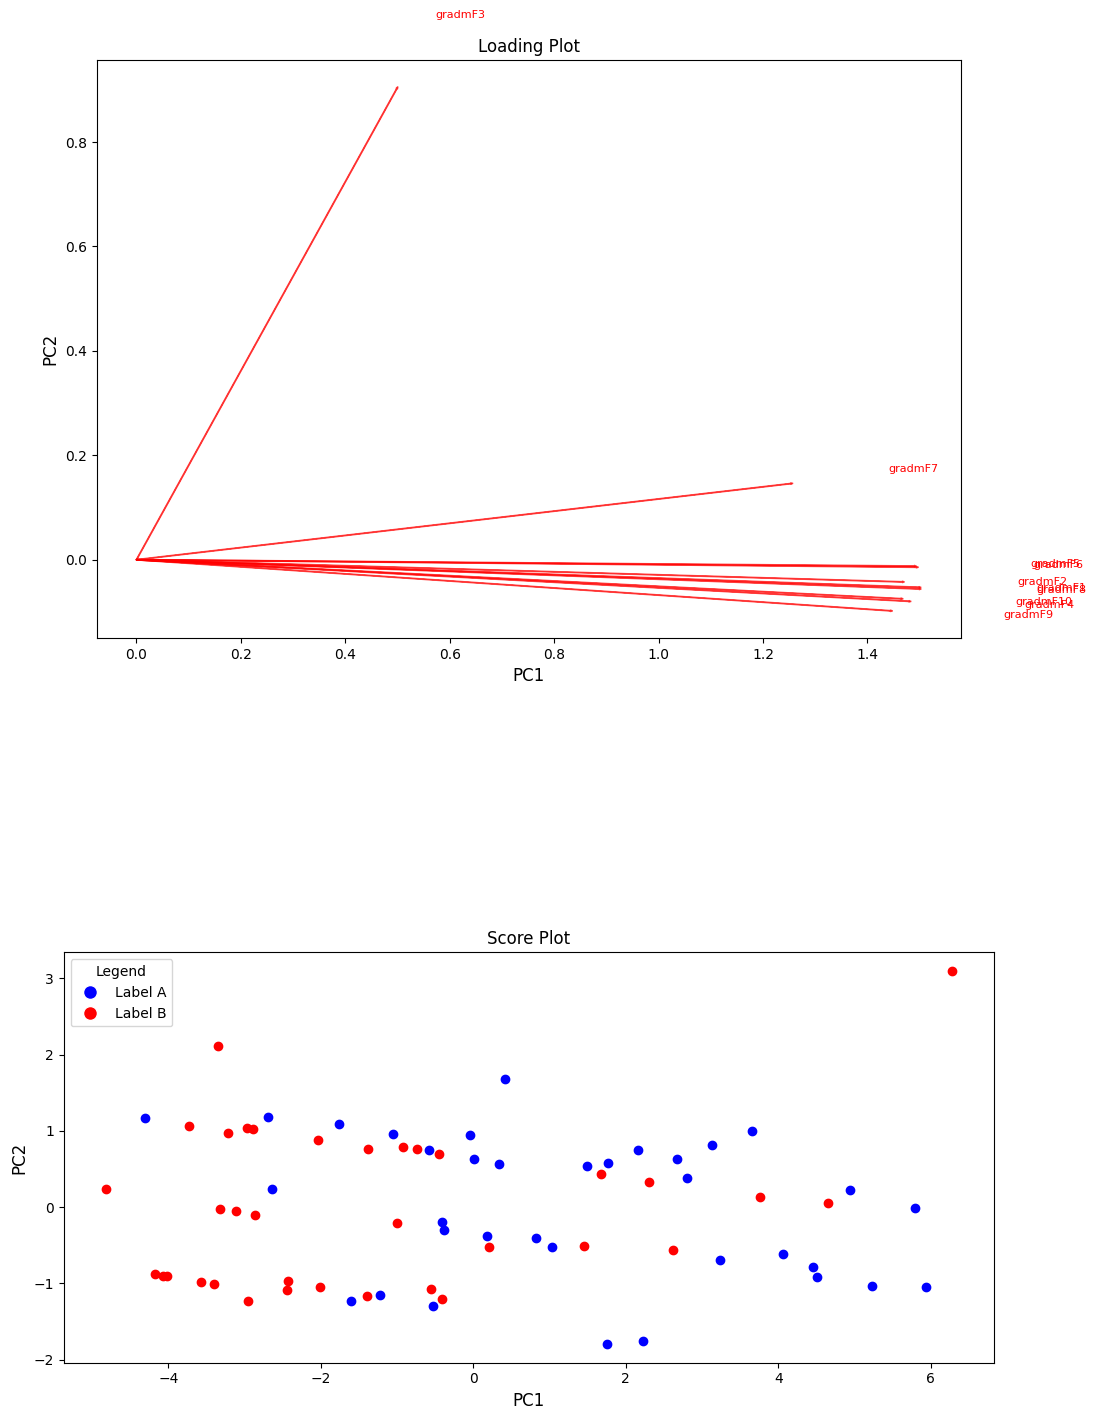

In [ ]:
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

# Loading Plot
for feature in loadings.index:
    color = 'blue' if feature.startswith('B') else 'red'
    ax1.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1,
              loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
    ax1.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1,
             loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=8, color=color)

ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Loading Plot', fontsize=12)

# Score Plot
legend_elements = []

for pc1, pc2, label in zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], df_grad.label):
    color = 'blue' if label.startswith('B') else 'red'
    scatter = ax2.scatter(pc1, pc2, color=color)

# Custom legend elements for Label A and Label B
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Label A'))
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Label B'))

ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('Score Plot', fontsize=12)

ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')

plt.subplots_adjust(hspace=0.4)

# Common legend for both plots
ax2.legend(handles=legend_elements, title='Legend', loc='upper left')

plt.show()


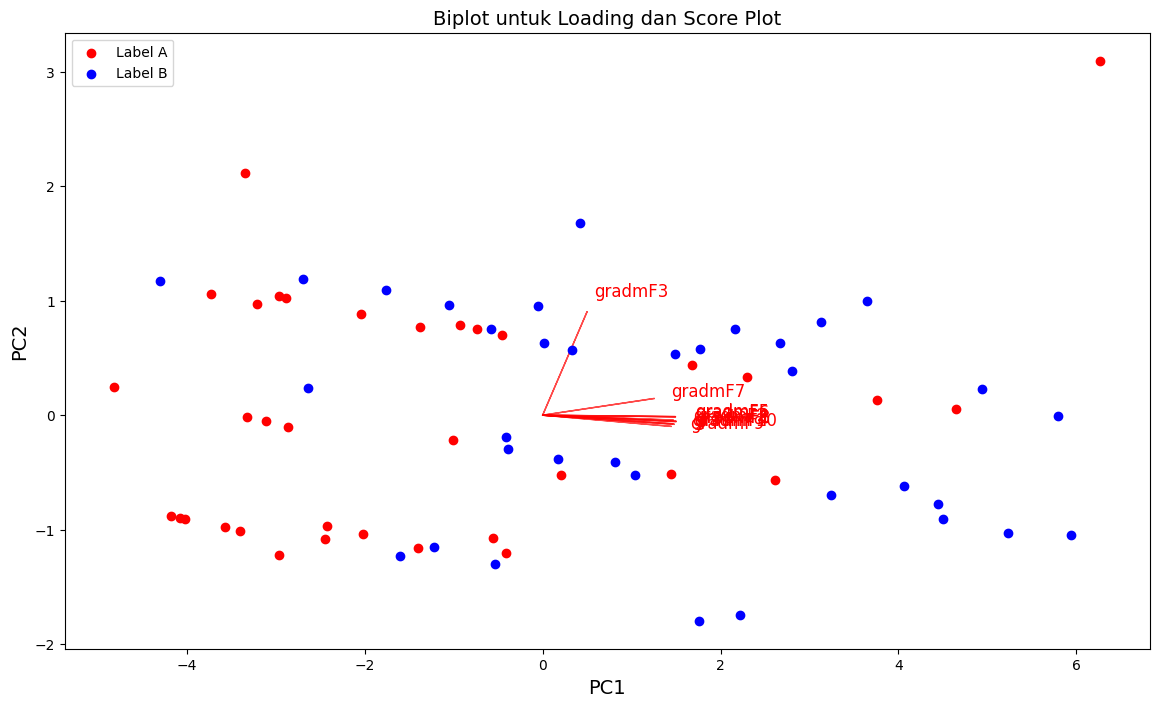

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

for i, feature in enumerate(loadings.index):
    color = 'blue' if feature.startswith('B') else 'red'
    ax.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1,
             loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
    ax.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1,
            loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=12, color=color)

for i, (pc1, pc2, feature) in enumerate(zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], df_grad.label)):
    color = 'blue' if feature.startswith('B') else 'red'
    ax.scatter(pc1, pc2, color=color)

# Menambahkan label A dan B pada legenda
ax.scatter([], [], label='Label A', color='red')
ax.scatter([], [], label='Label B', color='blue')

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_title('Biplot untuk Loading dan Score Plot', fontsize=14)
ax.legend()

plt.show()


#### Untuk Fouriermax

In [ ]:
x_eigen_f = df_fft.loc[:, features_f].values
cov_f_max_ordinary = np.cov(x_eigen_f, rowvar=False)
eigvals_f_ordinary, eigvect_f_ordinary = np.linalg.eigh(cov_f_max_ordinary)
covariance_matrix_df = pd.DataFrame(cov_f_max_ordinary, columns=features_f, index=features_f)

print("Covariance Matrix Sebelum Standarisasi:\n", cov_f_max_ordinary)

Covariance Matrix Sebelum Standarisasi:
 [[1.15940431e+09 2.46390716e+08 4.49122080e+06 8.90917739e+08
  1.18762103e+09 6.93011394e+08 2.95648981e+07 9.12616591e+08
  9.48218801e+08 9.74901664e+08]
 [2.46390716e+08 5.53225293e+07 1.08636586e+06 1.87259897e+08
  2.59106130e+08 1.51379894e+08 6.61055697e+06 1.87925238e+08
  1.95769750e+08 2.02413057e+08]
 [4.49122080e+06 1.08636586e+06 5.44380870e+04 2.61913669e+06
  5.18071960e+06 3.10383346e+06 1.86606212e+05 2.40679289e+06
  1.63683667e+06 3.33155469e+06]
 [8.90917739e+08 1.87259897e+08 2.61913669e+06 7.93819889e+08
  9.01568510e+08 5.23196108e+08 1.97935747e+07 8.12683856e+08
  9.39690483e+08 7.79520218e+08]
 [1.18762103e+09 2.59106130e+08 5.18071960e+06 9.01568510e+08
  1.26168921e+09 7.33170473e+08 3.16965995e+07 9.19201691e+08
  9.49285291e+08 9.90195061e+08]
 [6.93011394e+08 1.51379894e+08 3.10383346e+06 5.23196108e+08
  7.33170473e+08 4.30947815e+08 1.94665408e+07 5.25290772e+08
  5.42888302e+08 5.76304818e+08]
 [2.95648981e+07 

In [ ]:
cov_f_max_ordinary = np.cov(x_eigen_f, rowvar=False)
eigenvalues_f, eigenvectors_f = np.linalg.eigh(cov_f_max_ordinary)
sorted_indices = np.argsort(eigenvalues_f)[::-1]
eigenvalues_f = eigenvalues_f[sorted_indices]
eigen_f_table = pd.DataFrame({'Nilai': eigenvalues_f}, index=['Nilai Eigen {}'.format(i+1) for i in range(len(eigenvalues_f))])
print("Nilai Eigen:\n", eigenvalues_f)

Nilai Eigen:
 [6.11282868e+09 4.47488902e+08 6.20151224e+07 2.55996263e+07
 1.38428259e+07 8.64375590e+06 1.88366794e+06 1.30415464e+06
 1.07049617e+05 1.74832817e+04]


In [ ]:
eigenvalues_f, eigenvectors_f = np.linalg.eigh(cov_f_max_ordinary)
eigenvectors_f = eigenvectors_f[:, sorted_indices]
print("Vektor Eigen:\n", eigenvectors_f)

Vektor Eigen:
 [[-4.25094225e-01  3.17461072e-01 -6.22748245e-02  2.48146123e-01
  -6.68695754e-01 -4.38122361e-01 -6.75681336e-02  9.53054078e-02
  -1.73060351e-02 -2.33002690e-03]
 [-8.98864477e-02  8.89853668e-02  1.09162838e-01 -3.71778739e-02
  -1.31986277e-01  5.90628609e-02  4.28959820e-01 -8.74656316e-01
   2.76075284e-02 -1.46230452e-03]
 [-1.43057159e-03  6.18445682e-03  5.63958405e-03 -5.76196473e-03
  -1.24180693e-03  1.53408048e-02  1.59930920e-04 -5.52637708e-04
  -1.65627461e-01 -9.86014722e-01]
 [-3.54202657e-01 -2.11521857e-01  2.51985961e-02  5.57335361e-02
  -3.42109902e-01  7.54971927e-01  2.71259731e-01  2.49607210e-01
  -5.24812732e-02  1.99023714e-02]
 [-4.36193070e-01  4.30505885e-01  4.02512407e-01 -3.56282333e-01
   3.83983741e-01 -1.01892913e-01  3.20838850e-01  2.42603728e-01
  -1.23040627e-01  2.62324004e-02]
 [-2.52795281e-01  2.74864634e-01  2.64439952e-01 -1.26054658e-03
   7.14706601e-02  3.43698879e-01 -7.21551048e-01 -2.45176823e-01
   2.91585387e-01 

In [ ]:
x_eigen_f_standard = StandardScaler().fit_transform(x_eigen_f)

cov_mat_f_standard = np.cov(x_eigen_f_standard, rowvar=False)
eigenvalues_f_standard, eigenvectors_f_standard = np.linalg.eigh(cov_mat_f_standard)
covariance_matrix_f_df_standard = pd.DataFrame(cov_mat_f_standard, columns=features_f, index=features_f)
print("Matriks Kovarians(Standar):\n", cov_mat_f_standard)

Matriks Kovarians(Standar):
 [[1.01449275 0.98697197 0.57351459 0.9421241  0.99616936 0.99462536
  0.78896948 0.91944401 0.80419092 0.98900593]
 [0.98697197 1.01449275 0.63507149 0.90652905 0.99494581 0.99461222
  0.80758513 0.86673928 0.76008582 0.94003289]
 [0.57351459 0.63507149 1.01449275 0.4041985  0.63417835 0.65010513
  0.72673478 0.35386831 0.20259185 0.49323179]
 [0.9421241  0.90652905 0.4041985  1.01449275 0.91392488 0.9074864
  0.63835831 0.98949824 0.9631455  0.95570076]
 [0.99616936 0.99494581 0.63417835 0.91392488 1.01449275 1.0087078
  0.81084483 0.88774657 0.77177128 0.96294193]
 [0.99462536 0.99461222 0.65010513 0.9074864  1.0087078  1.01449275
  0.85207479 0.86804414 0.75520734 0.95894886]
 [0.78896948 0.80758513 0.72673478 0.63835831 0.81084483 0.85207479
  1.01449275 0.60132212 0.43295856 0.7409332 ]
 [0.91944401 0.86673928 0.35386831 0.98949824 0.88774657 0.86804414
  0.60132212 1.01449275 0.94192393 0.94968862]
 [0.80419092 0.76008582 0.20259185 0.9631455  0.77177

In [ ]:
eigenvalues_f_standard, eigenvectors_f_standard = np.linalg.eigh(cov_mat_f_standard)

sorted_indices = np.argsort(eigenvalues_f_standard)[::-1]
eigenvalues_f_standard = eigenvalues_f_standard[sorted_indices]
eigen_f_table_standard = pd.DataFrame({'Nilai': eigenvalues_f_standard}, index=['Nilai Eigen {}'.format(i+1) for i in range(len(eigenvalues_f_standard))])
print("Nilai Eigen (Standarisasi):\n", eigenvalues_f_standard)

Nilai Eigen (Standarisasi):
 [8.37312822e+00 1.20945456e+00 2.61568149e-01 1.54489715e-01
 7.64341689e-02 2.99177369e-02 2.08842974e-02 1.01421515e-02
 7.90135402e-03 1.00719265e-03]


In [ ]:
eigenvalues_f_standard, eigenvectors_f_standard = np.linalg.eigh(cov_mat_f_standard)
eigenvectors_f_standard = eigenvectors_f_standard[:, sorted_indices]
eigenvec_f_table_standard = pd.DataFrame(eigenvectors_f_standard, columns=['Vektor Eigen {}'.format(i+1) for i in range(len(eigenvalues_f_standard))])
print("Vektor Eigen (Standarisasi):\n", eigenvectors_f_standard)

Vektor Eigen (Standarisasi):
 [[-0.3438943   0.00150123  0.10718177 -0.27797897  0.11780945 -0.08174116
  -0.22976112  0.75356122 -0.38809041 -0.03398067]
 [-0.33903333 -0.08089673  0.04494144 -0.34060191 -0.42077048  0.4263112
  -0.49965356 -0.37537647 -0.09760704  0.04006711]
 [-0.2076446  -0.65643255 -0.70211203  0.1161749   0.12616092 -0.03944135
  -0.02838653  0.00099852 -0.03166936  0.01549773]
 [-0.33123422  0.25326163 -0.14391977  0.19643237 -0.06193271 -0.03129644
  -0.27815644  0.22983307  0.73852403 -0.29396725]
 [-0.34251268 -0.06977369  0.05053951 -0.3171572  -0.14142281  0.0070828
   0.62294199 -0.10347577 -0.01756731 -0.59628065]
 [-0.34245378 -0.10574137  0.12850866 -0.20147643 -0.20817785 -0.2098058
   0.33987634  0.06406727  0.32500123  0.70840251]
 [-0.27814315 -0.42572393  0.57473821  0.62717585 -0.05724059  0.0289576
  -0.02595808 -0.01498555 -0.07555833 -0.08366298]
 [-0.322528    0.29360717 -0.10485956  0.19252011  0.45752722  0.66468496
   0.25137396 -0.01155448

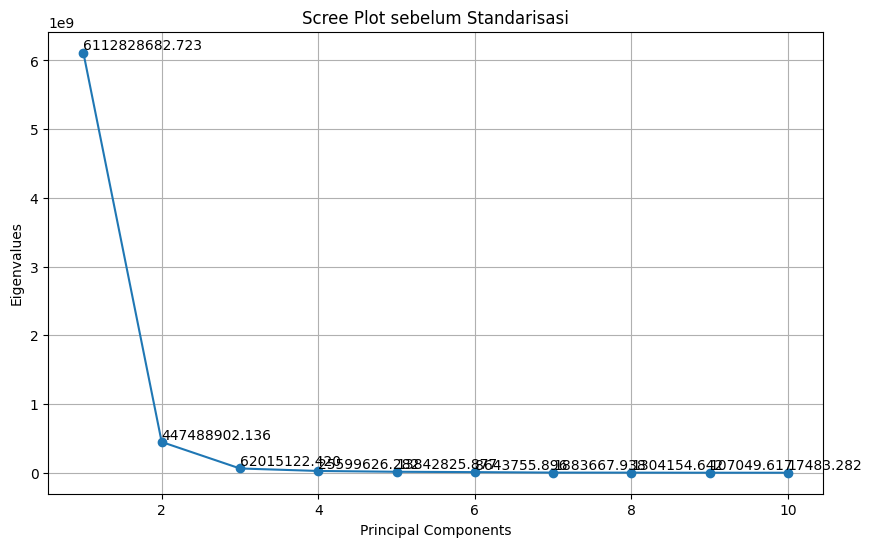

In [ ]:
sorted_indices_fft = np.argsort(eigvals_f_ordinary)[::-1]
sorted_eigvals_fft = eigvals_f_ordinary[sorted_indices_fft]

# Plotting scree plot dengan menampilkan nilai-eigenvalue
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigvals_fft) + 1), sorted_eigvals_fft, marker='o')
plt.title('Scree Plot sebelum Standarisasi')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)

# Menampilkan nilai-eigenvalue pada tiap titik plot
for i, eigval in enumerate(sorted_eigvals_fft):
    plt.text(i + 1, eigval, f'{eigval:.3f}', ha='left', va='bottom')

plt.show()

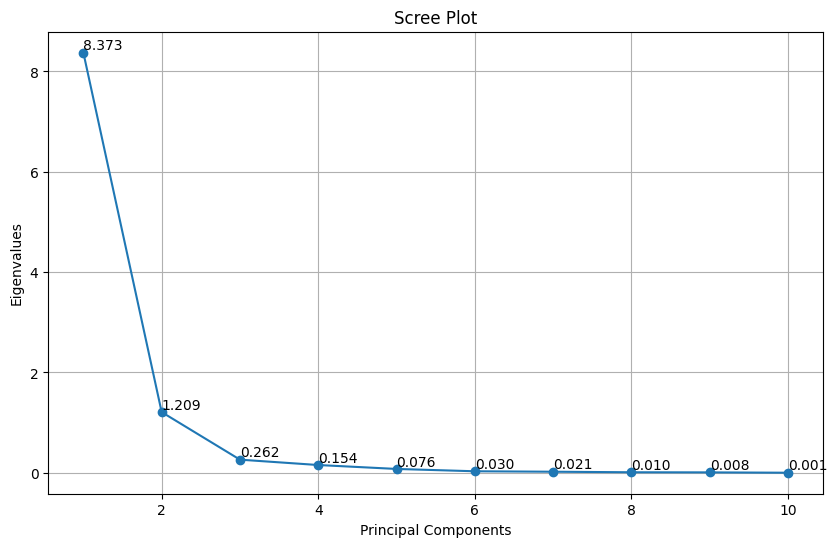

In [ ]:
sorted_indices_fft = np.argsort(eigenvalues_f_standard)[::-1]
sorted_eigvals_fft = eigenvalues_f_standard[sorted_indices_fft]

# Plotting scree plot dengan menampilkan nilai-eigenvalue
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(sorted_eigvals_fft) + 1), sorted_eigvals_fft, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.grid(True)

# Menampilkan nilai-eigenvalue pada tiap titik plot
for i, eigval in enumerate(sorted_eigvals_fft):
    plt.text(i + 1, eigval, f'{eigval:.3f}', ha='left', va='bottom')

plt.show()

In [ ]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca_var_f = sklearnPCA(n_components=4)
Y_sklearn_fft = sklearn_pca_var_f.fit_transform(X_std_fft)
explained_variance_ratio = sklearn_pca_var_f.explained_variance_ratio_

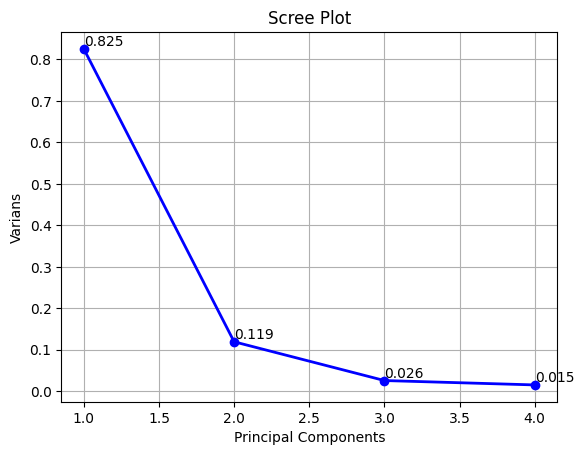

In [ ]:
PC_f_values = np.arange(sklearn_pca_var_f.n_components) + 1
plt.plot(PC_f_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Varians')
plt.grid()
for pc, var_ratio in zip(PC_f_values, explained_variance_ratio):
    plt.text(pc, var_ratio, f'{var_ratio:.3f}', ha='left', va='bottom')
plt.show()

In [ ]:
print(sklearn_pca_var_f.explained_variance_ratio_)

[0.82535121 0.11921766 0.02578315 0.01522827]


#####b. Biplot

In [ ]:
loadings_f = pd.DataFrame(sklearn_pca_f.components_.T, columns=['Principal Component 1', 'Principal Component 2'], index=features_f)
loadings_f

Principal Component 1  Principal Component 2
fouriermF1                0.343894              -0.001501
fouriermF2                0.339033               0.080897
fouriermF3                0.207645               0.656433
fouriermF4                0.331234              -0.253262
fouriermF5                0.342513               0.069774
fouriermF6                0.342454               0.105741
fouriermF7                0.278143               0.425724
fouriermF8                0.322528              -0.293607
fouriermF9                0.288893              -0.453810
fouriermF10               0.338414              -0.094703

In [ ]:
scalePC1_f = 1.0 / (loadings_f['Principal Component 1'].max() - loadings_f['Principal Component 1'].min())
scalePC2_f = 1.0 / (loadings_f['Principal Component 2'].max() - loadings_f['Principal Component 2'].min())

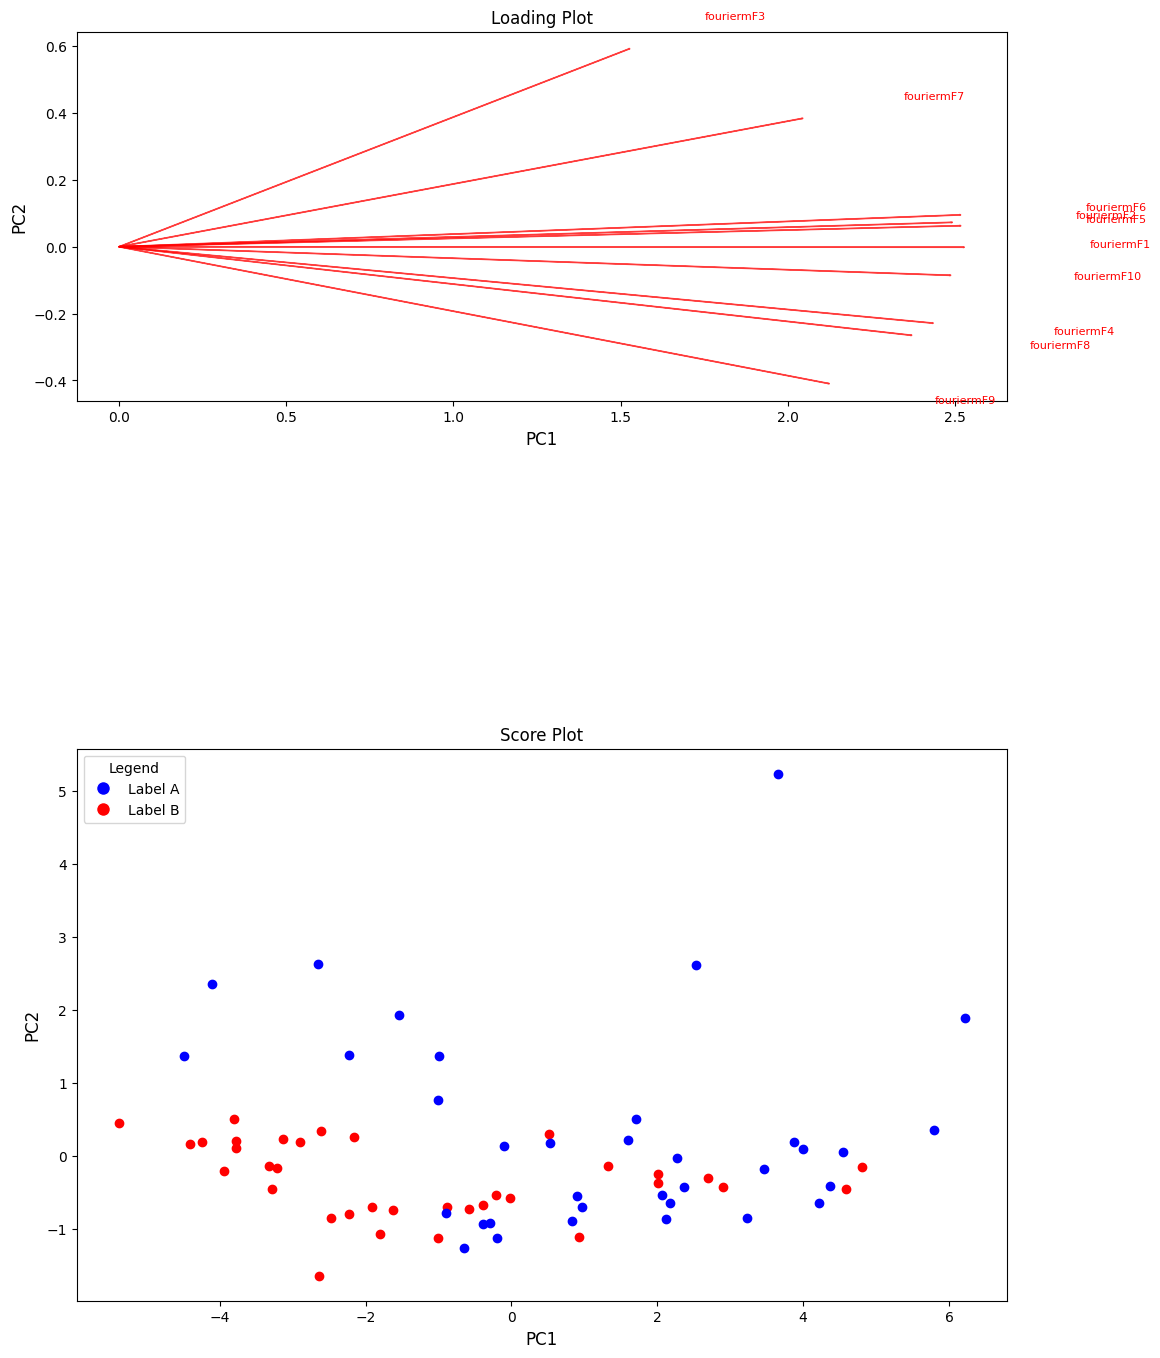

In [ ]:
from matplotlib.lines import Line2D

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 18))

# Loading Plot
for feature in loadings_f.index:
    color = 'blue' if feature.startswith('B') else 'red'
    ax1.arrow(0, 0, loadings_f.loc[feature, 'Principal Component 1'] * scalePC1_f,
              loadings_f.loc[feature, 'Principal Component 2'] * scalePC2_f, color=color, alpha=0.7)
    ax1.text(loadings_f.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1_f,
             loadings_f.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2_f, feature, fontsize=8, color=color)

ax1.set_xlabel('PC1', fontsize=12)
ax1.set_ylabel('PC2', fontsize=12)
ax1.set_title('Loading Plot', fontsize=12)

# Score Plot
legend_elements = []

for pc1, pc2, label in zip(Y_sklearn_fft[:, 0], Y_sklearn_fft[:, 1], df_fft.label):
    color = 'blue' if label.startswith('B') else 'red'
    scatter = ax2.scatter(pc1, pc2, color=color)

# Custom legend elements for Label A and Label B
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Label A'))
legend_elements.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Label B'))

ax2.set_xlabel('PC1', fontsize=12)
ax2.set_ylabel('PC2', fontsize=12)
ax2.set_title('Score Plot', fontsize=12)

ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')

plt.subplots_adjust(hspace=0.4)

# Common legend for both plots
ax2.legend(handles=legend_elements, title='Legend', loc='upper left')

plt.show()


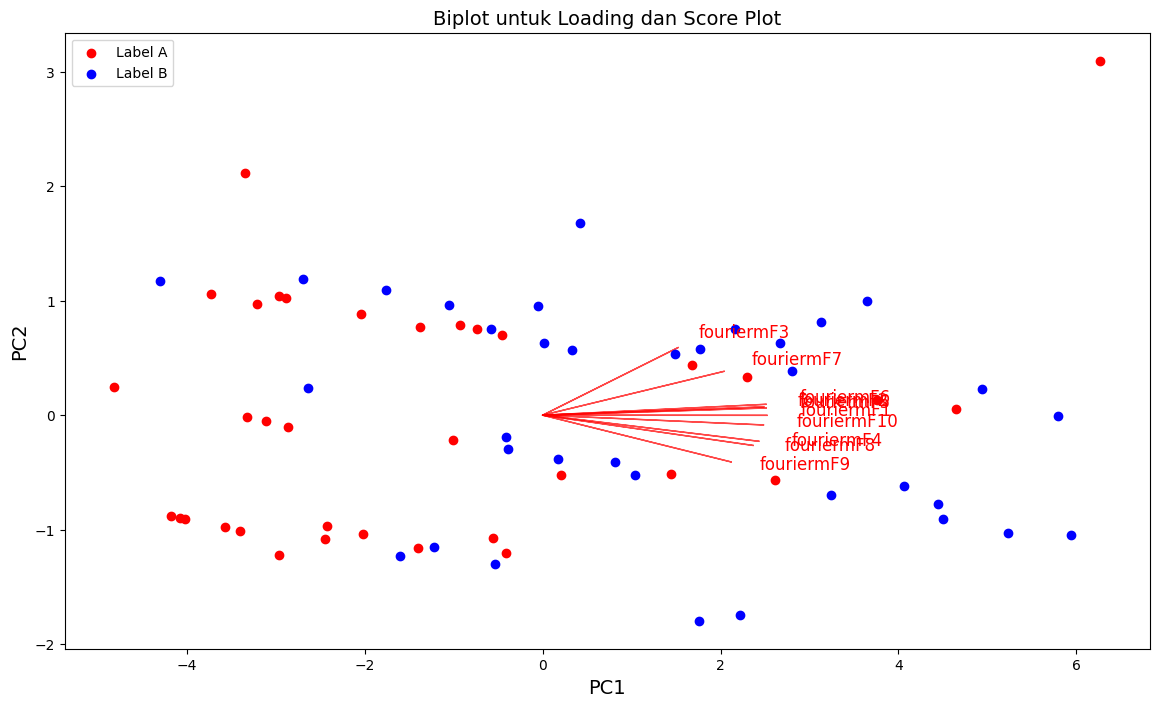

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

for i, feature in enumerate(loadings_f.index):
    color = 'blue' if feature.startswith('B') else 'red'
    ax.arrow(0, 0, loadings_f.loc[feature, 'Principal Component 1'] * scalePC1_f,
             loadings_f.loc[feature, 'Principal Component 2'] * scalePC2_f, color=color, alpha=0.7)
    ax.text(loadings_f.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1_f,
            loadings_f.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2_f, feature, fontsize=12, color=color)

for i, (pc1, pc2, feature) in enumerate(zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], df_grad.label)):
    color = 'blue' if feature.startswith('B') else 'red'
    ax.scatter(pc1, pc2, color=color)

# Menambahkan label A dan B pada legenda
ax.scatter([], [], label='Label A', color='red')
ax.scatter([], [], label='Label B', color='blue')

ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_title('Biplot untuk Loading dan Score Plot', fontsize=14)
ax.legend()

plt.show()


### Nomor 3: Dari hasil di atas dapatkah PCA digunakan untuk mengurangi dimensi data tersebut? Bagaimana jika data sangat nonlinier?


Ya, bisa, jika dilihat dari skor varians. Menurut referensi, Varians kumulatif dalam PCA ini memberikan gambaran sejauh mana komponen-komponen tersebut merangkum variasi dalam data. Semakin tinggi varians kumulatif, semakin banyak varians yang dijelaskan oleh komponen-komponen tersebut. Varians kumulatif PC1, PC2, atau PC3 dapat memberikan informasi tentang seberapa baik dua komponen tersebut dapat menjelaskan variasi dalam dataset. Dalam hal ini, jika kita mereduksi menjadi 2 dimensi, keduanya (Gradmax dan FFT) menunjukkan angka >94%. Artinya, PCA bisa digunakan dalam permasalahan soal.

##### Untuk Gradien

In [ ]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

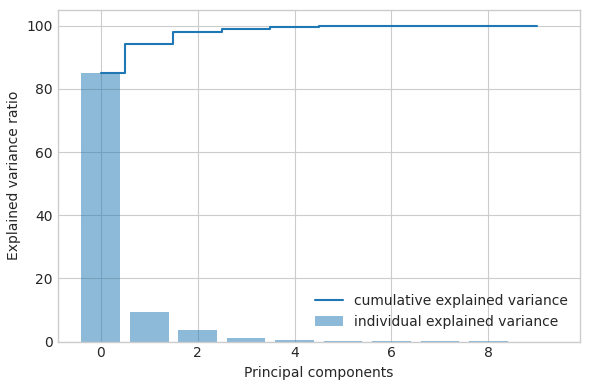

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<ipython-input-1265-c054ab27fd6a>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

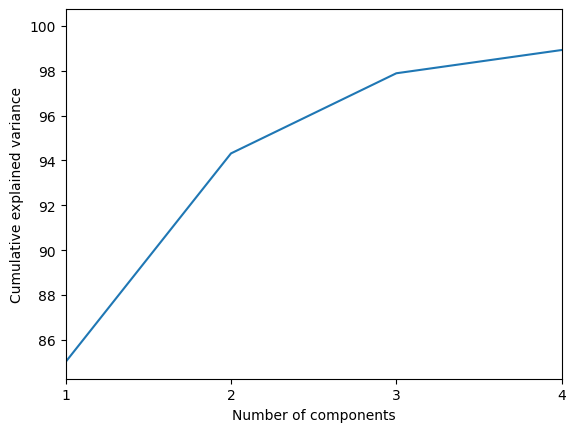

In [ ]:
xint = range(1, len(cum_var_exp) + 1)
plt.plot(xint, cum_var_exp)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [ ]:
print("\n",tot)
print("\n\n1. Kenaikan varians per dimensi\n",var_exp)
print("\n\n2. \n",cum_var_exp)
print("\n\n3. Persentase komponen varians 3 dimensi\n ",var_exp[0:3])
print("\n\n4. Persentase kumulatif varians dimensi 3\n",sum(var_exp[0:3]))


 10.144927536231892


1. Kenaikan varians per dimensi
 [85.01595599288856, 9.29881520356137, 3.573831084367592, 1.036990408656512, 0.5523426307002115, 0.30512885519667243, 0.09976202124344827, 0.069246859495552, 0.02762169513266522, 0.02030524875743836]


2. 
 [ 85.01595599  94.3147712   97.88860228  98.92559269  99.47793532
  99.78306418  99.8828262   99.95207306  99.97969475 100.        ]


3. Persentase komponen varians 3 dimensi
  [85.01595599288856, 9.29881520356137, 3.573831084367592]


4. Persentase kumulatif varians dimensi 3
 97.88860228081754


##### Untuk FFT

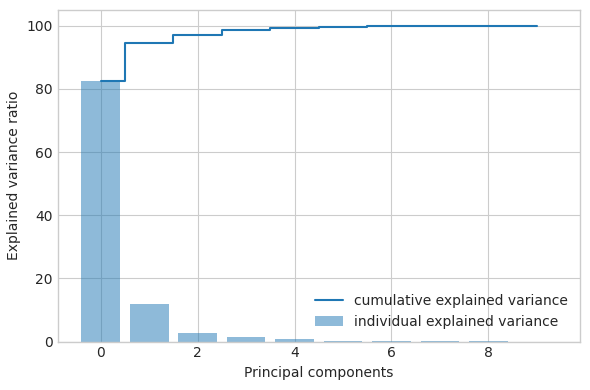

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(10), var_f_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(10), cum_f_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

<ipython-input-1268-b436fc883140>:7: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(1, 4, 1)


(1.0, 4.0)

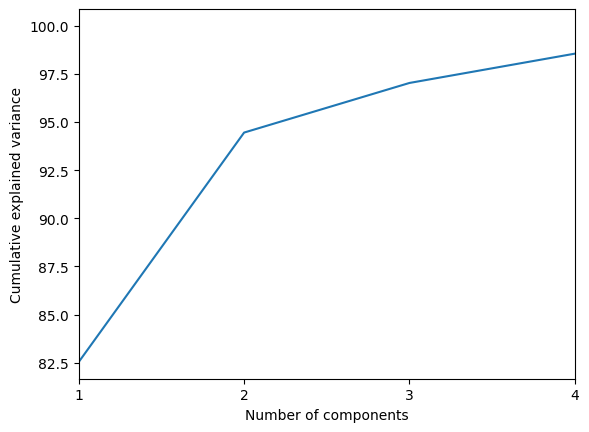

In [ ]:
xint = range(1, len(cum_f_var_exp) + 1)
plt.plot(xint, cum_f_var_exp)

plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.xticks(xint)
plt.xlim(1, 4, 1)

In [ ]:
print("\n",tot)
print("\n\n1. Kenaikan varians per dimensi\n",var_f_exp)
print("\n\n2. \n",cum_f_var_exp)
print("\n\n3. Persentase komponen varians 3 dimensi\n ",var_f_exp[0:3])
print("\n\n4. Persentase kumulatif varians dimensi 3\n",sum(var_f_exp[0:3]))


 10.144927536231892


1. Kenaikan varians per dimensi
 [82.53512098555021, 11.921766329058022, 2.5783146115192146, 1.5228271897067926, 0.753422521605245, 0.2949034067981436, 0.20585950277402157, 0.09997263582145681, 0.0778847753022078, 0.009928041864691008]


2. 
 [ 82.53512099  94.45688731  97.03520193  98.55802912  99.31145164
  99.60635504  99.81221455  99.91218718  99.99007196 100.        ]


3. Persentase komponen varians 3 dimensi
  [82.53512098555021, 11.921766329058022, 2.5783146115192146]


4. Persentase kumulatif varians dimensi 3
 97.03520192612744


Dari hasil, model yang saya kembangkan pada gradienmax memiliki hasil lebih tinggi. Karena, pada tugas sebelumnya saya menggunakan hitungan gradien max orde 2 untuk menghitung gradien. Juga terlihat dalam biplot:
Arah dari panah menunjukkan arah variabel dalam ruang komponen utama. Jika dua panah mengarah ke arah yang sama, itu menunjukkan korelasi positif antara variabel yang bersangkutan dan komponen utama.

Panah yang lebih panjang menunjukkan kontribusi yang lebih tinggi, dan variabel dengan panah yang lebih panjang memiliki dampak yang lebih besar pada komponen utama.

Sudut antara panah mencerminkan korelasi antar variabel. Jika panah berdekatan, variabel tersebut berkorelasi positif; jika panah berlawanan arah, mereka berkorelasi negatif.

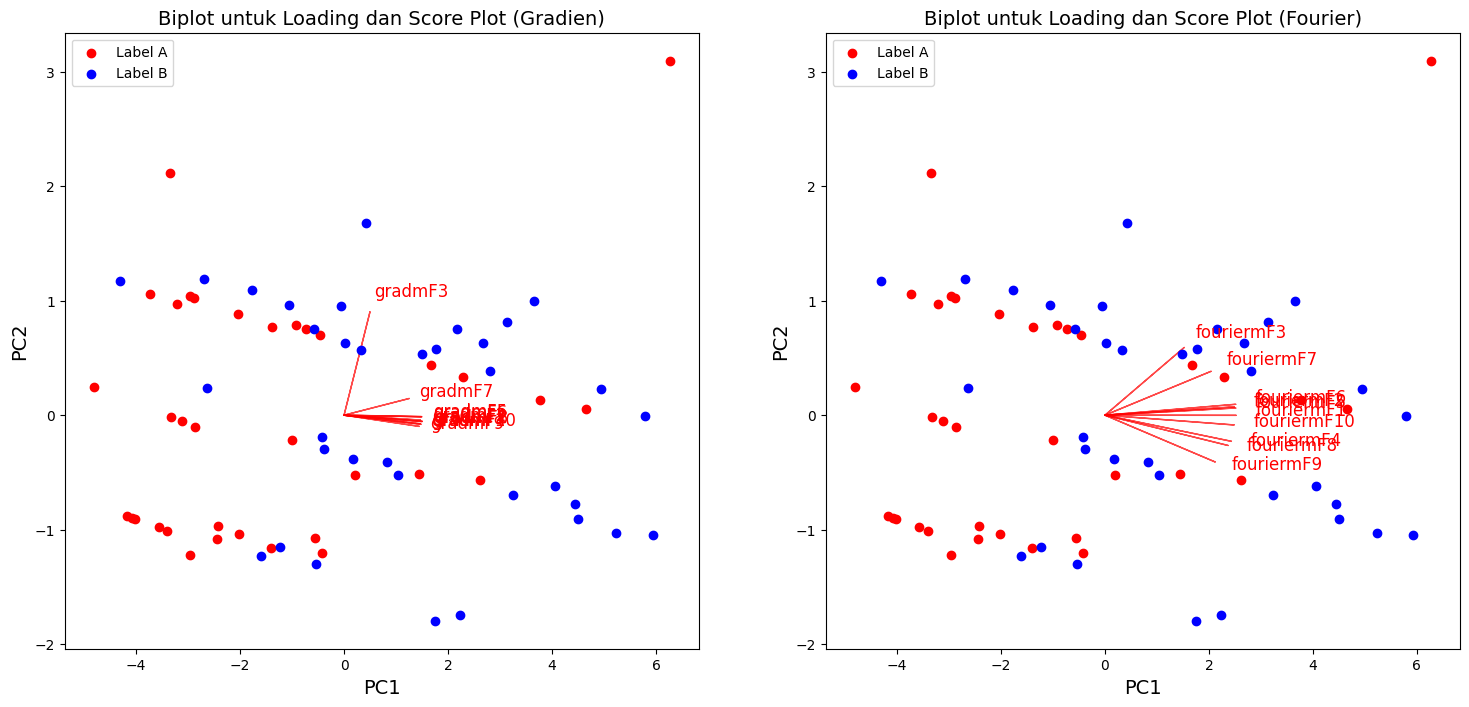

In [ ]:
import matplotlib.pyplot as plt

# Code 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Plot for the first set of data (code 1)
for i, feature in enumerate(loadings.index):
    color = 'blue' if feature.startswith('B') else 'red'
    ax1.arrow(0, 0, loadings.loc[feature, 'Principal Component 1'] * scalePC1,
             loadings.loc[feature, 'Principal Component 2'] * scalePC2, color=color, alpha=0.7)
    ax1.text(loadings.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1,
            loadings.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2, feature, fontsize=12, color=color)

for i, (pc1, pc2, feature) in enumerate(zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], df_grad.label)):
    color = 'blue' if feature.startswith('B') else 'red'
    ax1.scatter(pc1, pc2, color=color)

ax1.scatter([], [], label='Label A', color='red')
ax1.scatter([], [], label='Label B', color='blue')

ax1.set_xlabel('PC1', fontsize=14)
ax1.set_ylabel('PC2', fontsize=14)
ax1.set_title('Biplot untuk Loading dan Score Plot (Gradien)', fontsize=14)
ax1.legend()

# Code 2
for i, feature in enumerate(loadings_f.index):
    color = 'blue' if feature.startswith('B') else 'red'
    ax2.arrow(0, 0, loadings_f.loc[feature, 'Principal Component 1'] * scalePC1_f,
             loadings_f.loc[feature, 'Principal Component 2'] * scalePC2_f, color=color, alpha=0.7)
    ax2.text(loadings_f.loc[feature, 'Principal Component 1'] * 1.15 * scalePC1_f,
            loadings_f.loc[feature, 'Principal Component 2'] * 1.15 * scalePC2_f, feature, fontsize=12, color=color)

for i, (pc1, pc2, feature) in enumerate(zip(Y_sklearn_grad[:, 0], Y_sklearn_grad[:, 1], df_grad.label)):
    color = 'blue' if feature.startswith('B') else 'red'
    ax2.scatter(pc1, pc2, color=color)

ax2.scatter([], [], label='Label A', color='red')
ax2.scatter([], [], label='Label B', color='blue')

ax2.set_xlabel('PC1', fontsize=14)
ax2.set_ylabel('PC2', fontsize=14)
ax2.set_title('Biplot untuk Loading dan Score Plot (Fourier)', fontsize=14)
ax2.legend()

plt.show()


Namun, untuk data sangat non-linear, PCA memiliki kekurangan untuk cakupan data asli.

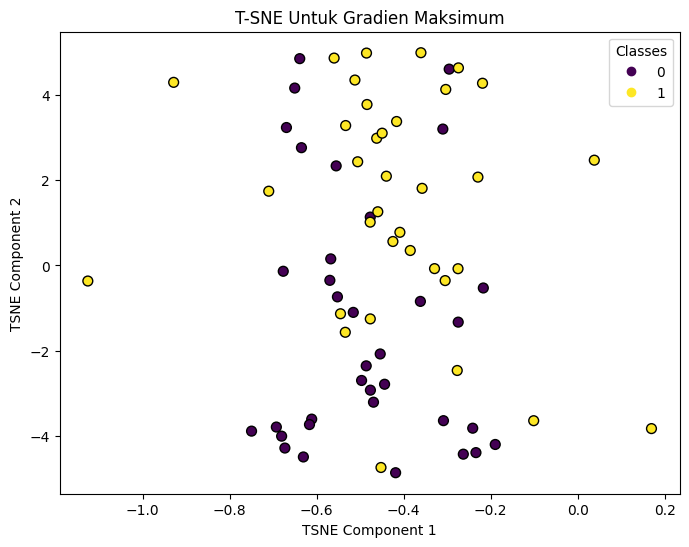

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = df_grad.drop('label', axis=1)
data = newgrad
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_grad['label'])

# Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

# Menambahkan legenda
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('T-SNE Untuk Gradien Maksimum')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


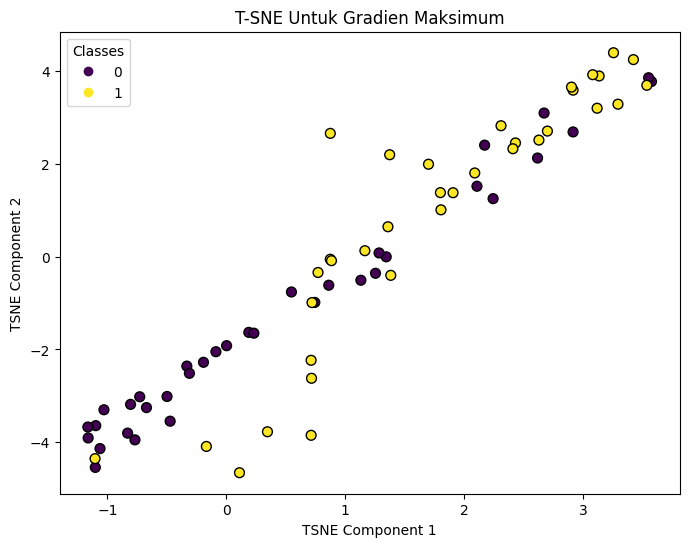

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = df_fft.drop('label', axis=1)
data = newgrad
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_fft['label'])

# Apply T-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

# Menambahkan legenda
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('T-SNE Untuk Gradien Maksimum')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.show()


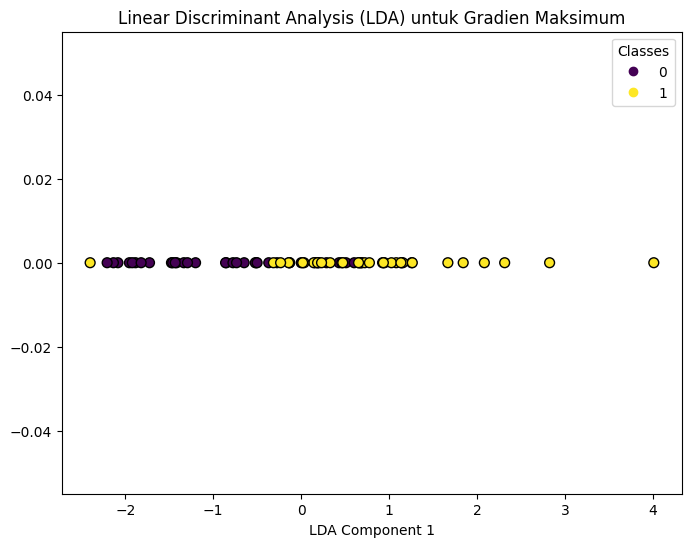

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = df_grad.drop('label', axis=1)
data = newgrad
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_grad['label'])

# Check the number of features and classes
n_features = data.shape[1]
n_classes = len(np.unique(labels))

# Set n_components to the minimum of n_features and n_classes - 1
n_components = min(n_features, n_classes - 1)

# Apply LDA to reduce dimensionality to n_components
lda = LinearDiscriminantAnalysis(n_components=n_components)
data_lda = lda.fit_transform(data, labels)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_lda[:, 0], np.zeros_like(data_lda[:, 0]), c=labels, cmap='viridis', edgecolor='k', s=50)

# Menambahkan legenda
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Linear Discriminant Analysis (LDA) untuk Gradien Maksimum')
plt.xlabel(f'LDA Component 1')
plt.show()


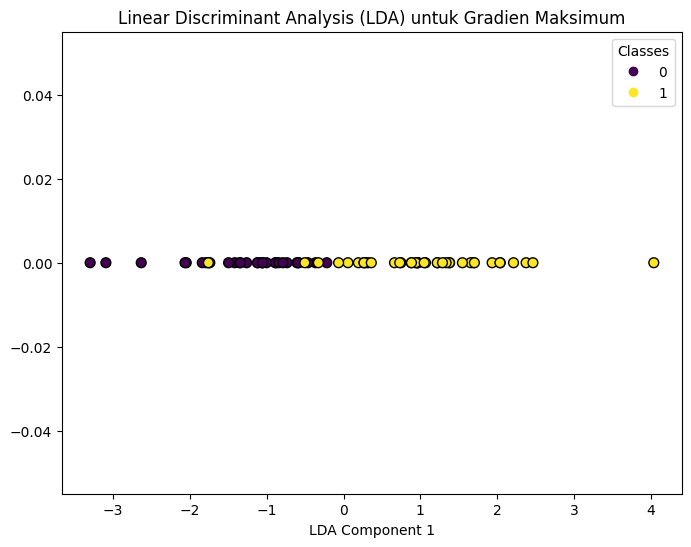

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Generate sample data with 10 columns
# np.random.seed(42)
newgrad = df_fft.drop('label', axis=1)
data = newgrad
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df_fft['label'])

# Check the number of features and classes
n_features = data.shape[1]
n_classes = len(np.unique(labels))

# Set n_components to the minimum of n_features and n_classes - 1
n_components = min(n_features, n_classes - 1)

# Apply LDA to reduce dimensionality to n_components
lda = LinearDiscriminantAnalysis(n_components=n_components)
data_lda = lda.fit_transform(data, labels)

# Plot the results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_lda[:, 0], np.zeros_like(data_lda[:, 0]), c=labels, cmap='viridis', edgecolor='k', s=50)

# Menambahkan legenda
plt.legend(*scatter.legend_elements(), title="Classes")

plt.title('Linear Discriminant Analysis (LDA) untuk Gradien Maksimum')
plt.xlabel(f'LDA Component 1')
plt.show()


Dari hasil, untuk mereduksi dimensi yang paling memungkinkan adalah T-SNE, dibanding LDA. Karena PCA berfokus pada memaksimalkan varian total data, sedangkan LDA berfokus pada memaksimalkan perbedaan antar kelas.
PCA tidak mempertimbangkan label kelas, sedangkan LDA melibatkan informasi kelas dalam prosesnya. Sedangkan T-SNE: Berciri Hyperparameter "perplexity" pada t-SNE mengontrol seberapa banyak perhatian algoritma memberikan pada jumlah tetangga yang dekat saat merancang distribusi probabilitas di ruang dimensi rendah.

###Nomor 4: Dari hasil di atas gunakan PCA untuk mengurangi dimensi data dengan rasio varians yang dijelaskan sebesar 95%.

Untuk gradien

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca_95 = PCA(0.95)
principalComponents_95 = pca_95.fit_transform(X_std_grad)

In [ ]:
PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.95)

In [ ]:
pca_95.n_components_

3

In [ ]:
pca_95 = PCA(n_components=3)

principalDf_95 = pd.DataFrame(data = principalComponents_95
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
finalDf_95 = pd.concat([principalDf_95,pd.DataFrame(y_grad,columns = ['label'])], axis = 1)


In [ ]:
finalDf_95

principal component 1  principal component 2  principal component 3 label
0                1.447261              -0.510069              -0.138621     A
1                6.271390               3.096683              -0.353008     A
2               -2.887823               1.027180              -0.166725     A
3               -0.733178               0.756693              -0.293709     A
4                2.612020              -0.567980               0.175224     A
..                    ...                    ...                    ...   ...
65               0.818558              -0.405456               0.154619     B
66               3.651068               0.996220              -1.554197     B
67               2.223998              -1.749307              -0.465410     B
68               4.061665              -0.620608               0.892975     B
69               1.756080              -1.795651              -0.958206     B

[70 rows x 4 columns]

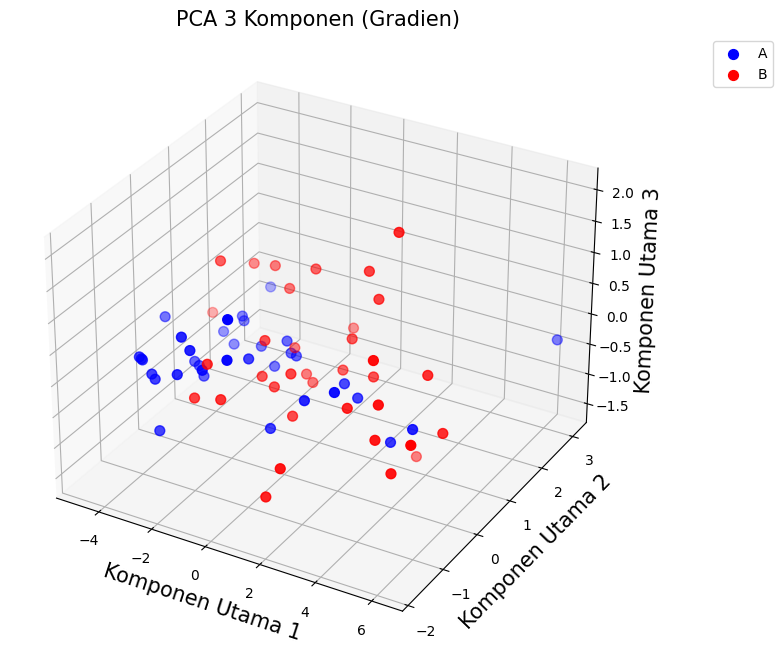

In [ ]:
# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('Komponen Utama 1', fontsize=15)
ax.set_ylabel('Komponen Utama 2', fontsize=15)
ax.set_zlabel('Komponen Utama 3', fontsize=15)
ax.set_title('PCA 3 Komponen (Gradien)', fontsize=15)

scatter_handles = []

for label in ['A', 'B']:
    indicesToKeep = finalDf_95['label'].str.startswith(label)
    color = 'blue' if label == 'A' else 'red'
    scatter = ax.scatter(finalDf_95.loc[indicesToKeep, 'principal component 1'],
                         finalDf_95.loc[indicesToKeep, 'principal component 2'],
                         finalDf_95.loc[indicesToKeep, 'principal component 3'],
                         c=[color],
                         s=50,
                         label=label)
    scatter_handles.append(scatter)

ax.legend(handles=scatter_handles, loc='upper right', bbox_to_anchor=(1.25, 1))

ax.grid()
plt.show()

Untuk fourier

In [ ]:
pca_95 = PCA(0.95)
principalComponents_95 = pca_95.fit_transform(X_std_fft)

In [ ]:
PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None, svd_solver='auto', tol=0.0, whiten=False)

PCA(n_components=0.95)

In [ ]:
pca_95.n_components_

3

In [ ]:
pca_95 = PCA(n_components=3)

principalDf_95 = pd.DataFrame(data = principalComponents_95
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [ ]:
finalDf_95_fft = pd.concat([principalDf_95,pd.DataFrame(y_grad,columns = ['label'])], axis = 1)


In [ ]:
finalDf_95_fft

principal component 1  principal component 2  principal component 3 label
0                0.932516              -1.114516               0.648664     A
1                4.587502              -0.454362               0.571207     A
2               -3.319910              -0.140987               0.084281     A
3               -1.000427              -1.134800               0.184895     A
4                2.006951              -0.245690               0.245551     A
..                    ...                    ...                    ...   ...
65               0.830259              -0.899972              -0.343422     B
66               3.231977              -0.860392              -1.024248     B
67               2.172884              -0.644336              -0.335822     B
68               4.003568               0.092108               0.329476     B
69               2.125316              -0.873797              -0.986238     B

[70 rows x 4 columns]

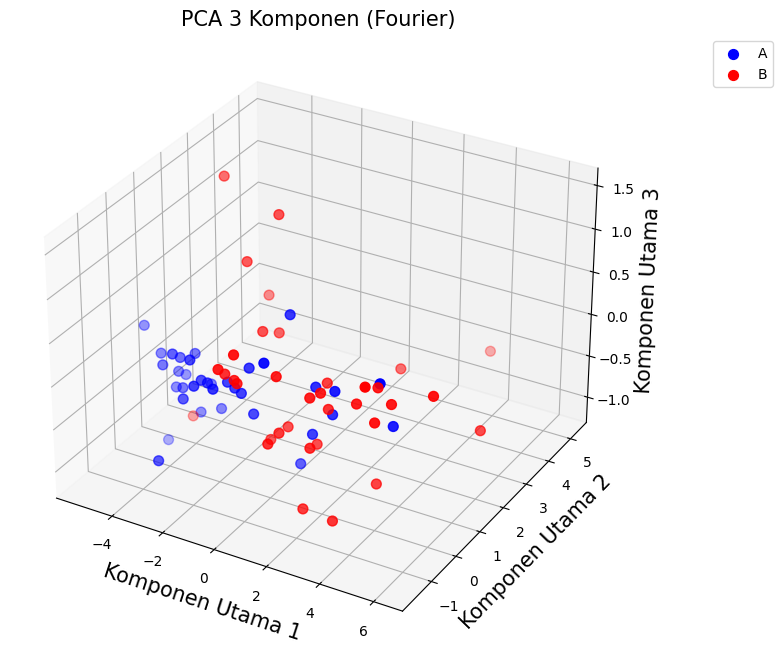

In [ ]:
# Plotting
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.set_xlabel('Komponen Utama 1', fontsize=15)
ax.set_ylabel('Komponen Utama 2', fontsize=15)
ax.set_zlabel('Komponen Utama 3', fontsize=15)
ax.set_title('PCA 3 Komponen (Fourier)', fontsize=15)

scatter_handles = []

for label in ['A', 'B']:
    indicesToKeep = finalDf_95_fft['label'].str.startswith(label)
    color = 'blue' if label == 'A' else 'red'
    scatter = ax.scatter(finalDf_95_fft.loc[indicesToKeep, 'principal component 1'],
                         finalDf_95_fft.loc[indicesToKeep, 'principal component 2'],
                         finalDf_95_fft.loc[indicesToKeep, 'principal component 3'],
                         c=[color],
                         s=50,
                         label=label)
    scatter_handles.append(scatter)

ax.legend(handles=scatter_handles, loc='upper right', bbox_to_anchor=(1.25, 1))

ax.grid()
plt.show()